In [34]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import os
import matplotlib.pyplot as plt
import seaborn as sns

def compute_statistics(df):
    # Replace zeros with NaN to avoid log10(0) errors
    df_replaced = df.replace(0, np.nan)
    
    # Compute statistics in normal space
    stats_normal = df.describe().loc[['min', 'max', 'mean', 'std']]
    
    # Compute statistics in log10 space
    stats_log = np.log10(df_replaced).describe().loc[['min', 'max', 'mean', 'std']]
    
    return stats_normal, stats_log

# Code to perform ANOVA for each cytokine and visualize significant results
def perform_anova_and_visualize(data, cytokines, alpha=0.05):
    anova_results = {}
    significant_cytokines = []

    # Creating a directory for saving plots
    plot_dir = 'figures/uninfected/anova_plots/'
    os.makedirs(plot_dir, exist_ok=True)

    for cytokine in cytokines:
        # Preparing data for ANOVA
        anova_data = [data[data['Cohort'] == cohort][cytokine].dropna() for cohort in data['Cohort'].unique()]
        
        # Performing ANOVA
        anova_result = stats.f_oneway(*anova_data)
        anova_results[cytokine] = anova_result

        # Check if the result is significant
        if anova_result.pvalue < alpha:
            significant_cytokines.append(cytokine)
            # Visualizing the significant result
            plt.figure(figsize=(10, 6))
            sns.boxplot(x='Cohort', y=cytokine, data=data)
            plt.title(f'Significant ANOVA Result for {cytokine} (p={anova_result.pvalue:.2e})')
            plt.xticks(rotation=45)
            plt.tight_layout()
            # Save the plot
            plt.savefig(plot_dir + f'{cytokine}_anova.png')
            plt.close()

    return anova_results, significant_cytokines, plot_dir

In [40]:
# Load the dataset
file_path = 'data/Cohort data/Uninfected Cytokine Data.xlsx'
data = pd.read_excel(file_path)
cytokine_data = data.drop(columns=['Cohort', 'ID', 'Plate'])
global_stats_normal, global_stats_log = compute_statistics(cytokine_data)

# Save result dataframe to file
global_stats_normal.to_csv(os.path.join('analysis/uninfected/', 'global_cytokine_normal.csv'))
global_stats_log.to_csv(os.path.join('analysis/uninfected/', 'global_cytokine_log.csv'))

# Compute statistics for each cohort separately
cohort_stats_normal = {}
cohort_stats_log = {}

for cohort in data['Cohort'].unique():
    cohort_data = data[data['Cohort'] == cohort].drop(columns=['Cohort', 'ID', 'Plate'])
    cohort_stats_normal[cohort], cohort_stats_log[cohort] = compute_statistics(cohort_data)
    # Save the results to a file for each cohort
    cohort_stats_normal[cohort].to_csv(f'analysis/uninfected/{cohort}_cytokine_normal.csv', index=False)
    cohort_stats_log[cohort].to_csv(f'analysis/uninfected/{cohort}_cytokine_log.csv', index=False)

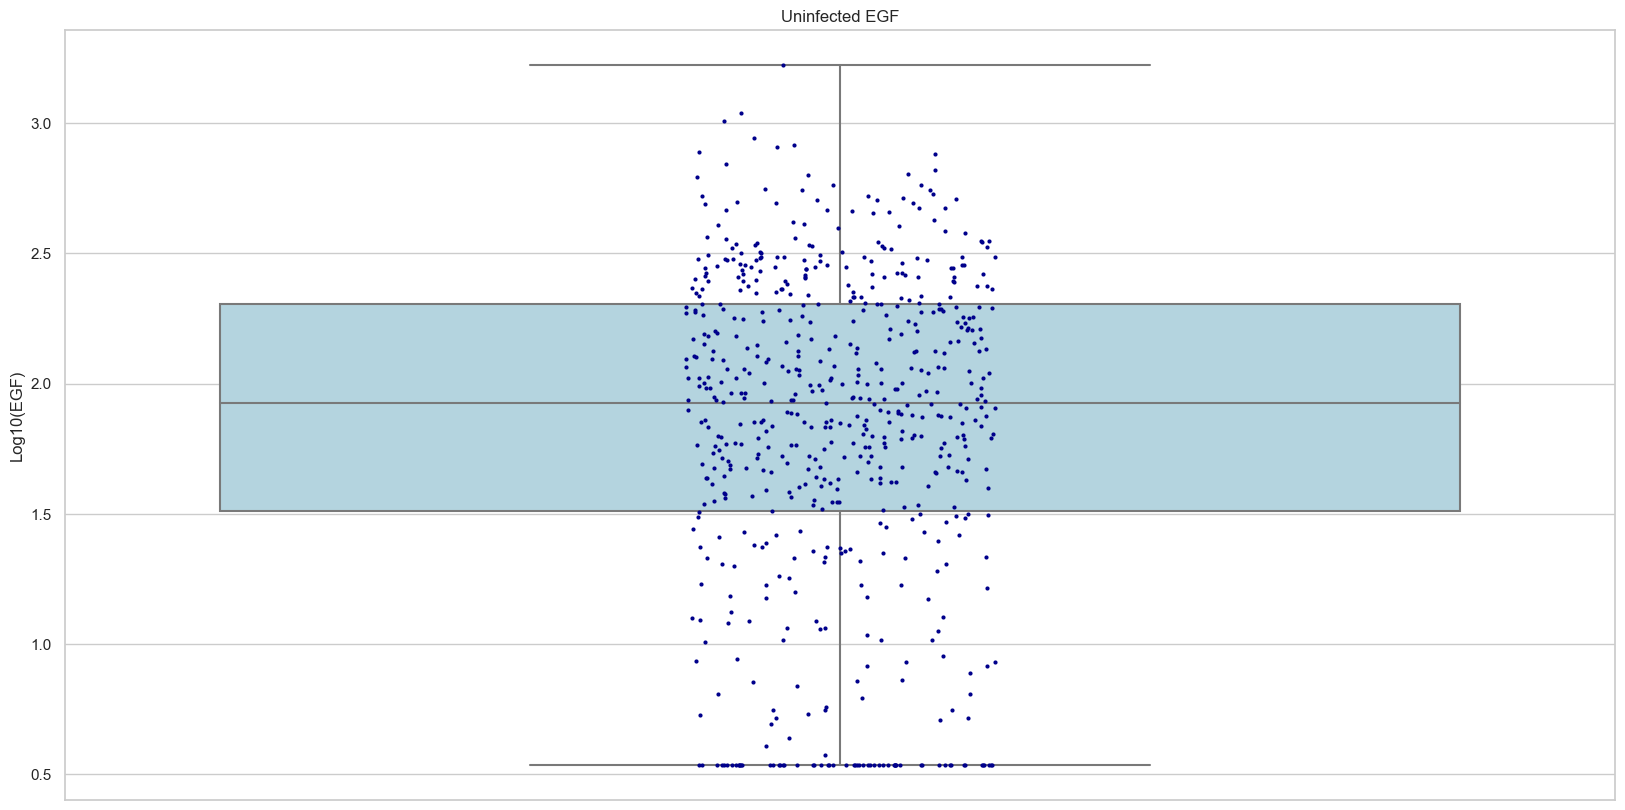

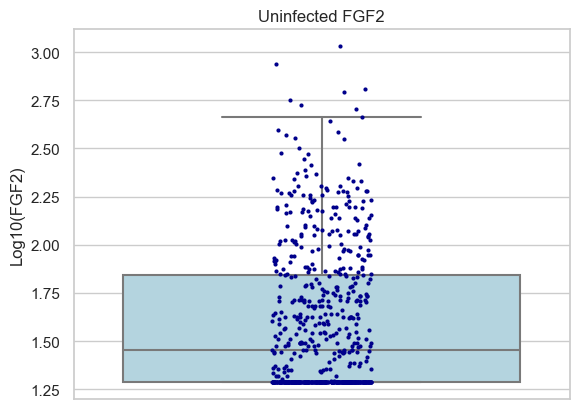

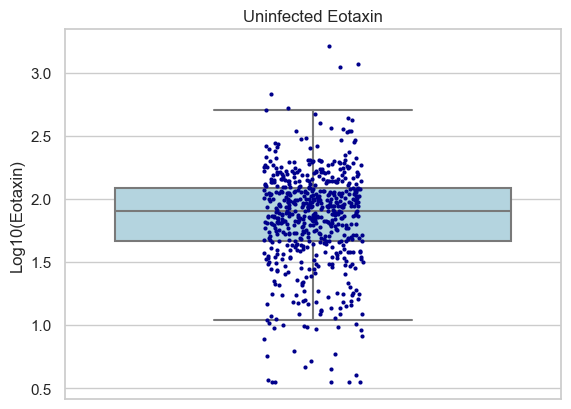

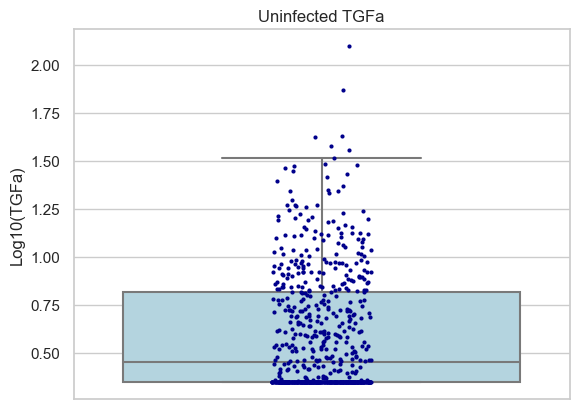

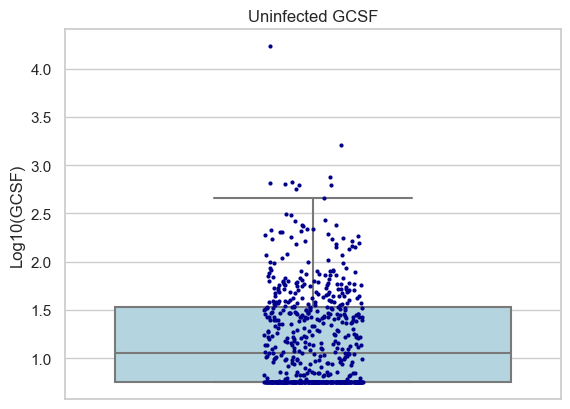

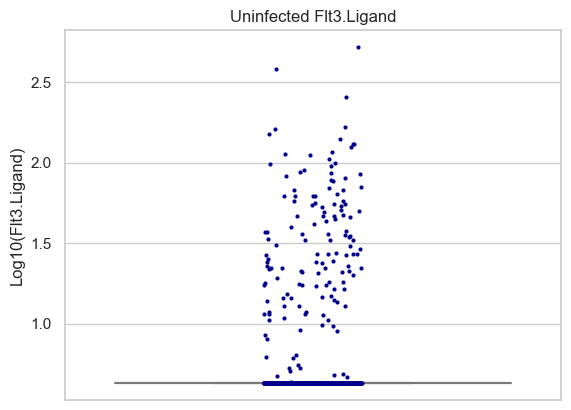

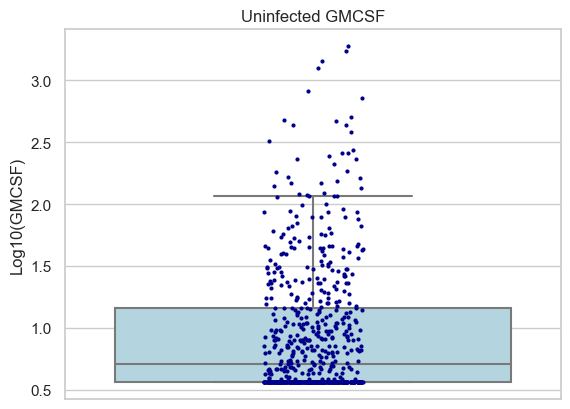

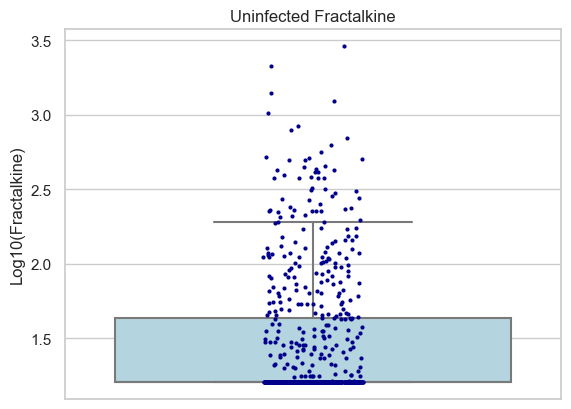

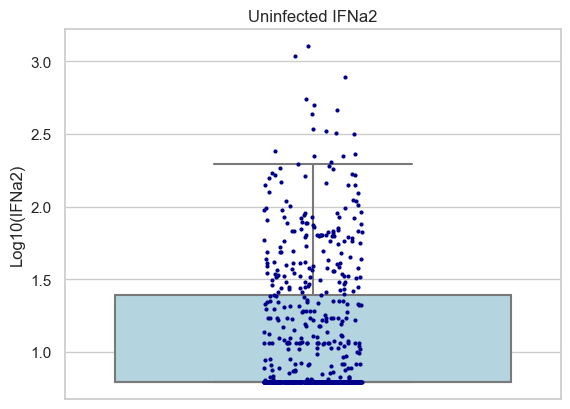

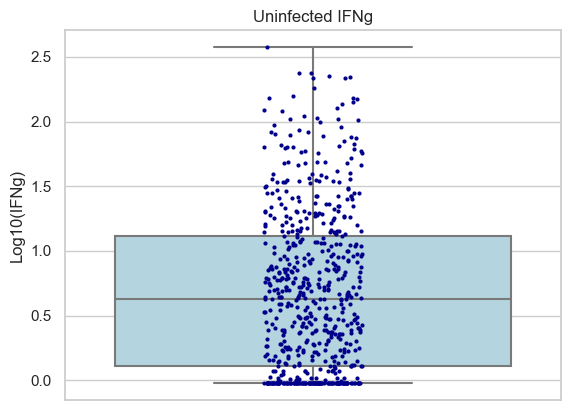

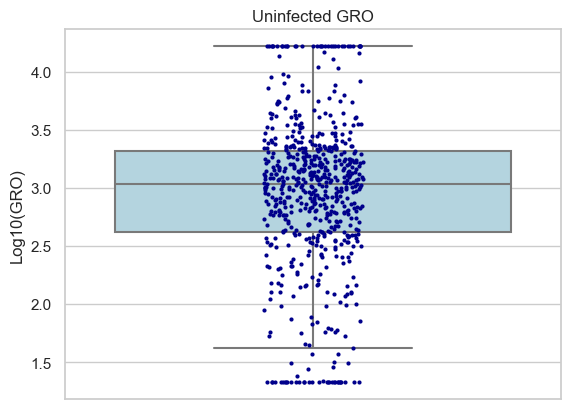

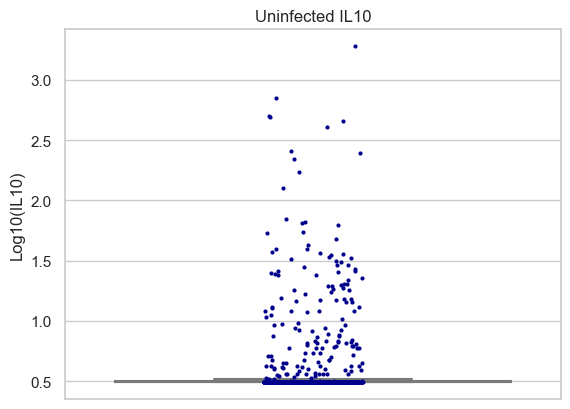

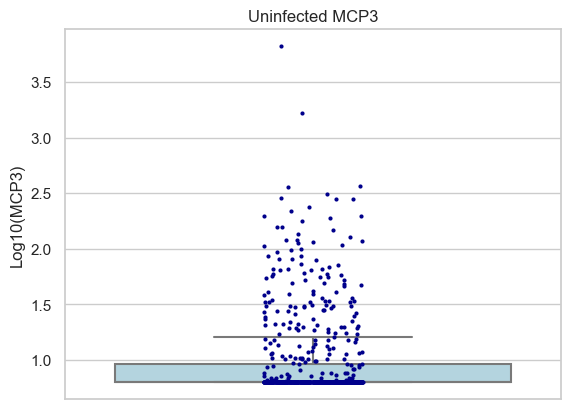

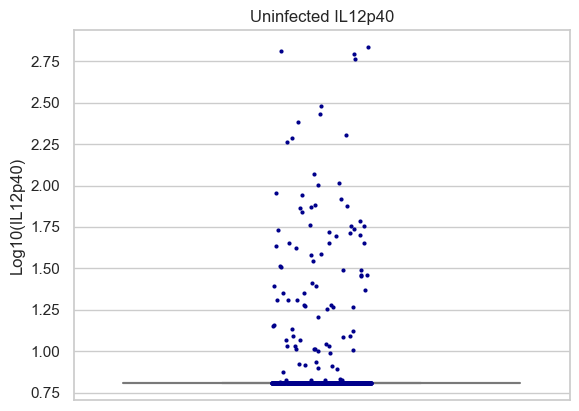

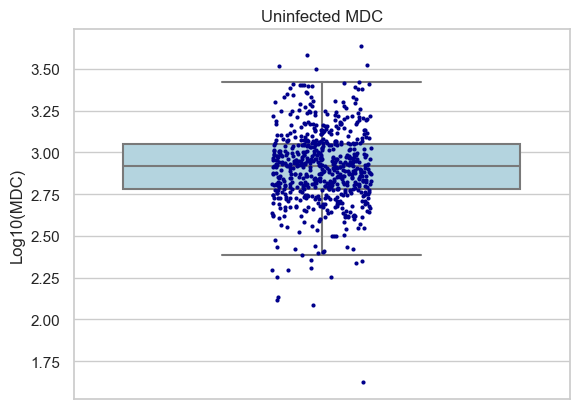

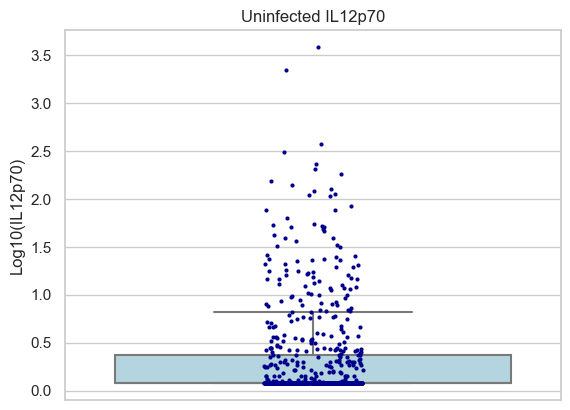

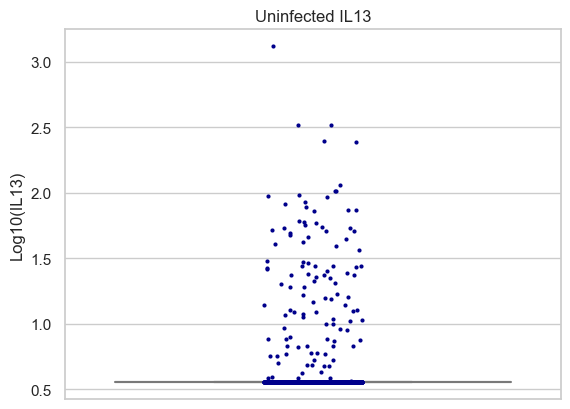

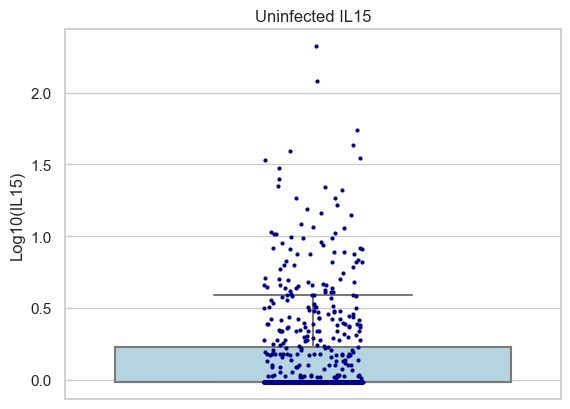

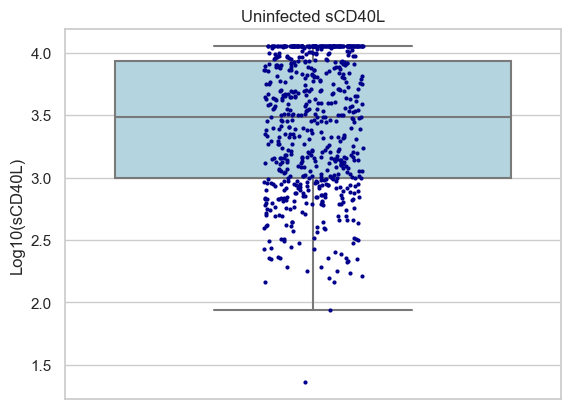

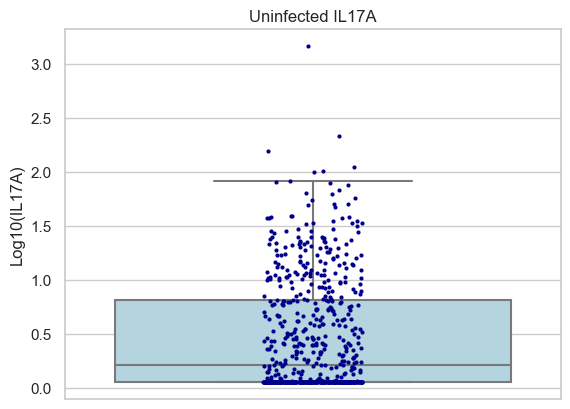

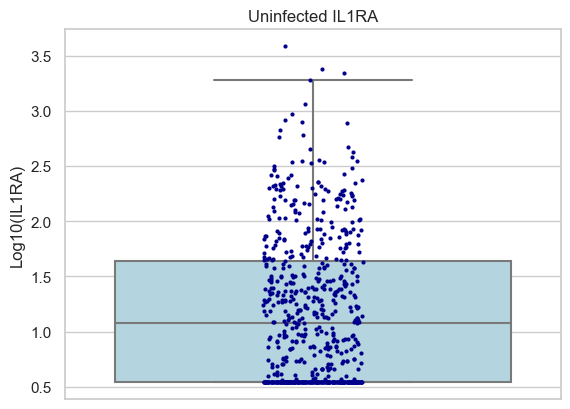

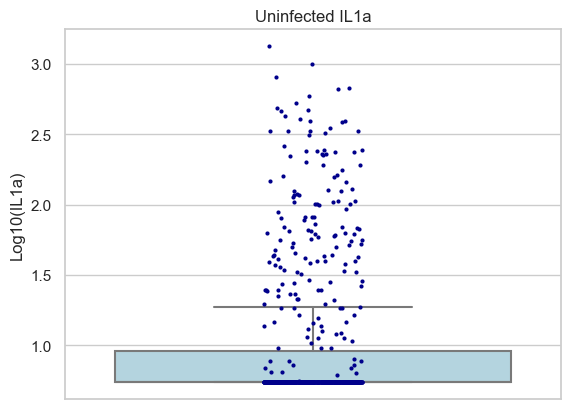

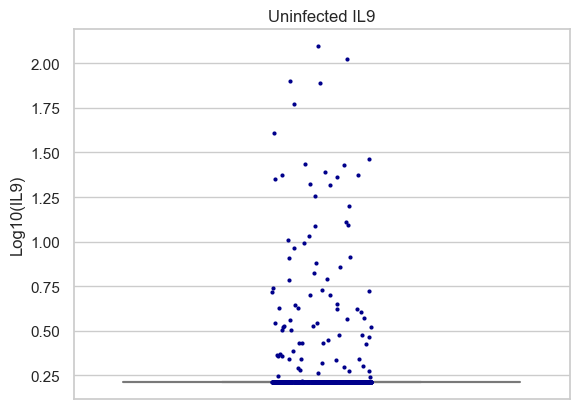

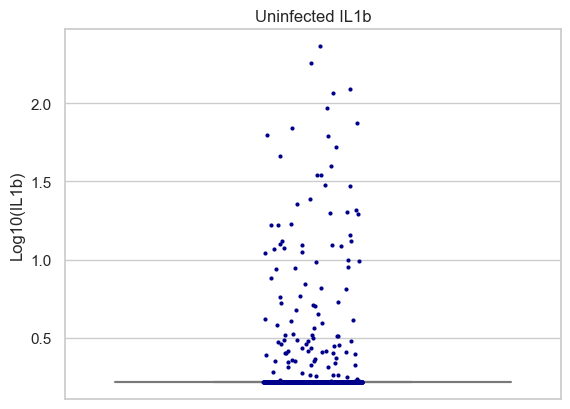

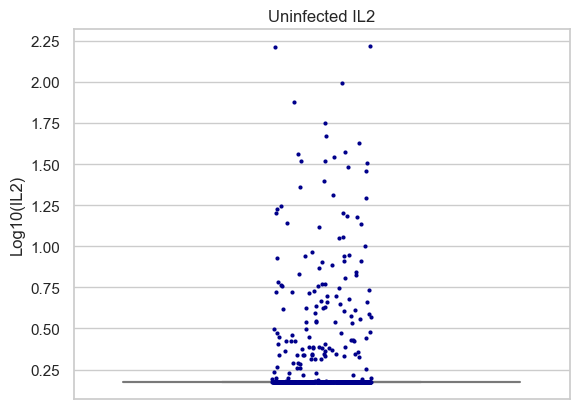

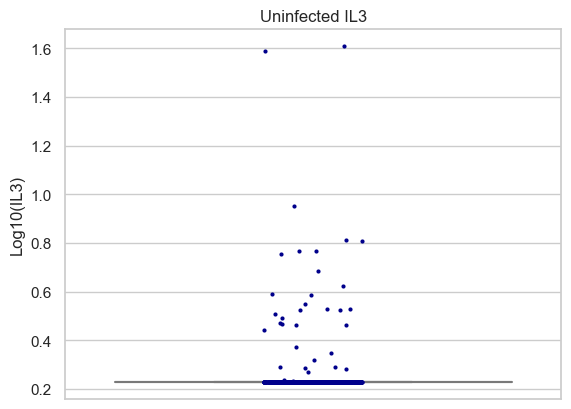

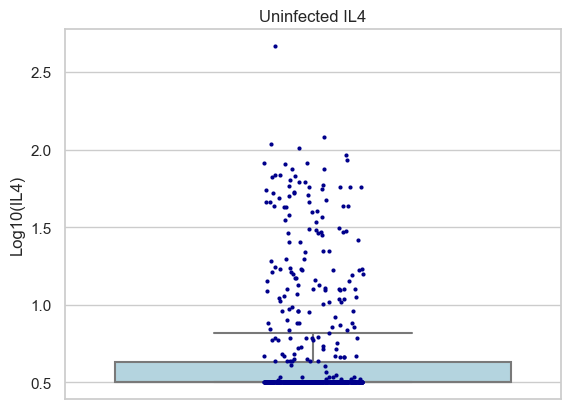

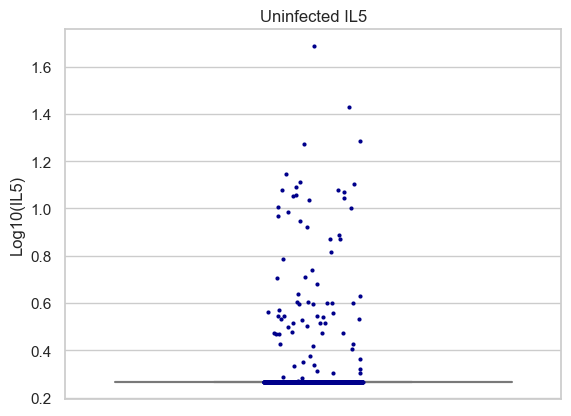

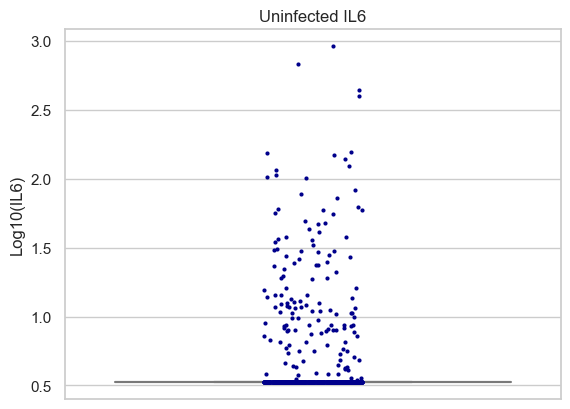

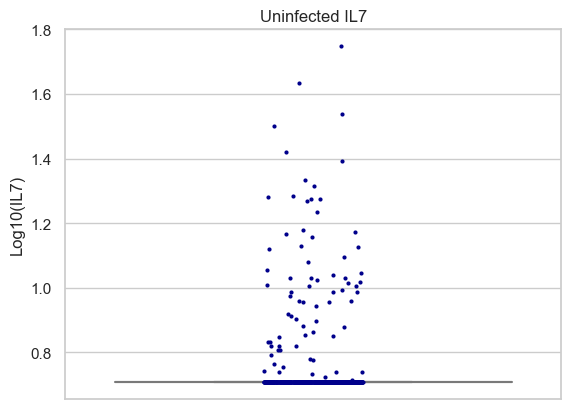

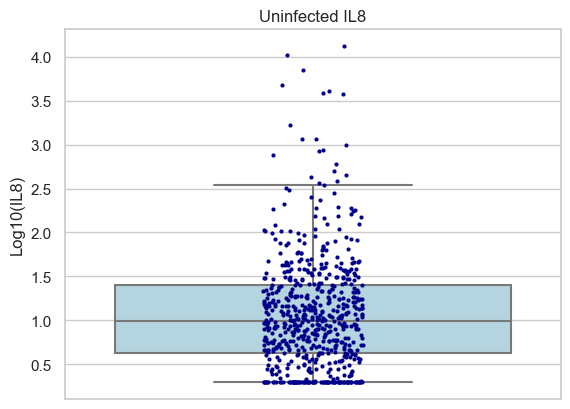

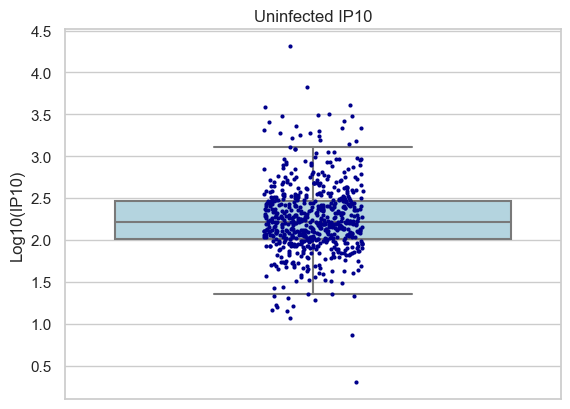

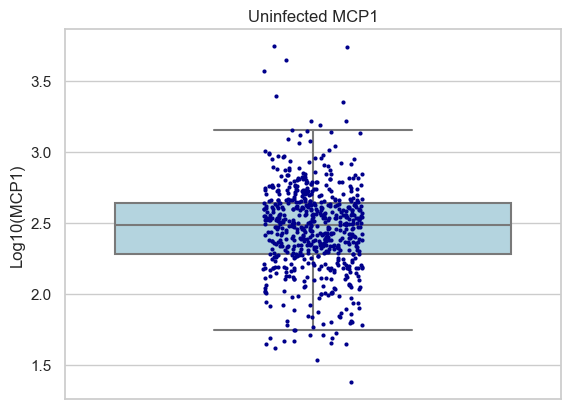

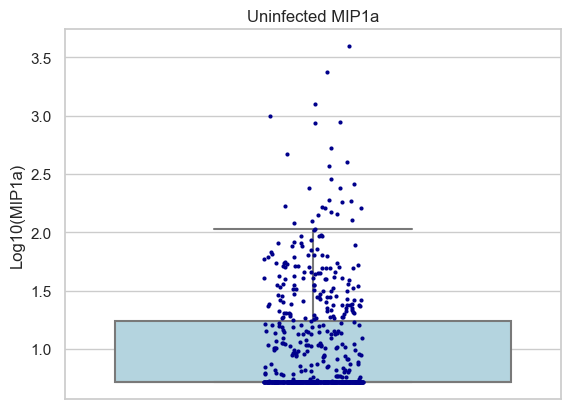

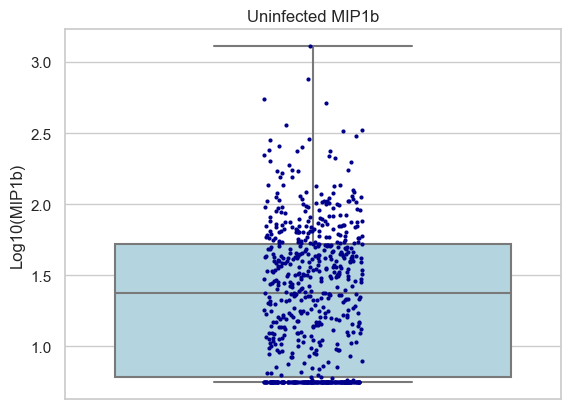

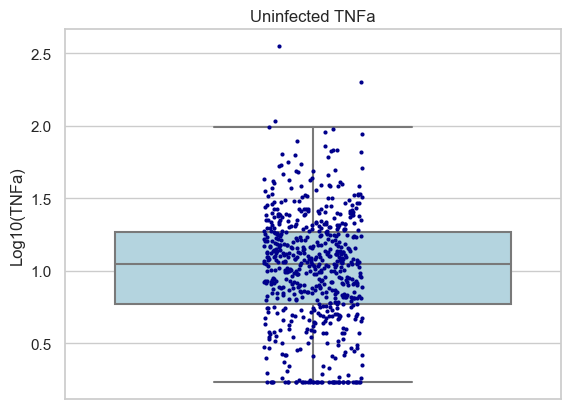

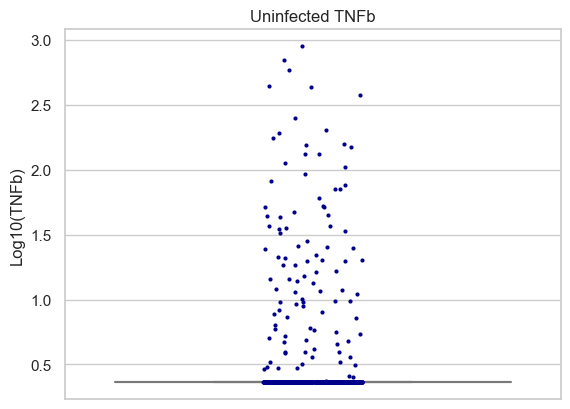

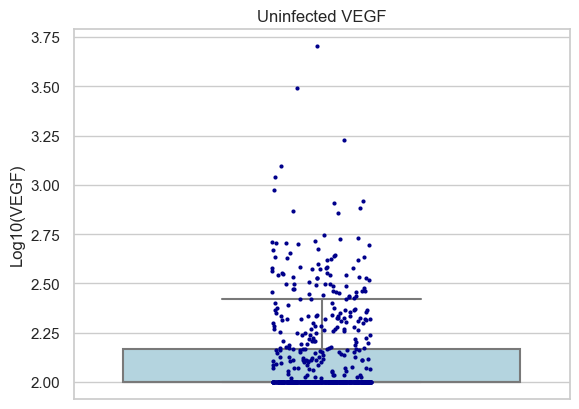

In [38]:
data = pd.read_excel(file_path)
cytokine_data = data.drop(columns=['Cohort', 'ID', 'Plate'])

# Set the plot style
sns.set(style="whitegrid")

# Plotting box and swarm plot for each cytokine
plt.figure(figsize=(20,10))

# Iterating through the subset of cytokines
for i, cytokine in enumerate(cytokine_data.columns):
    sns.boxplot(y=np.log10(cytokine_data[cytokine]), color='lightblue', fliersize=0)
    sns.stripplot(y=np.log10(cytokine_data[cytokine]), color='darkblue', size=3, jitter=True)
    plt.title(f'Uninfected {cytokine}')
    plt.ylabel(f'Log10({cytokine})')
    plt.savefig(f'figures/uninfected/cytokines/{cytokine}.png')
    plt.show()


C:\Users\jorda\AppData\Local\Temp\ipykernel_22728\2186932264.py:14: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.stripplot(x='Cohort', y=np.log10(data[cytokine].replace(0, np.nan)), data=data, size=3, jitter=True, palette='Set2')


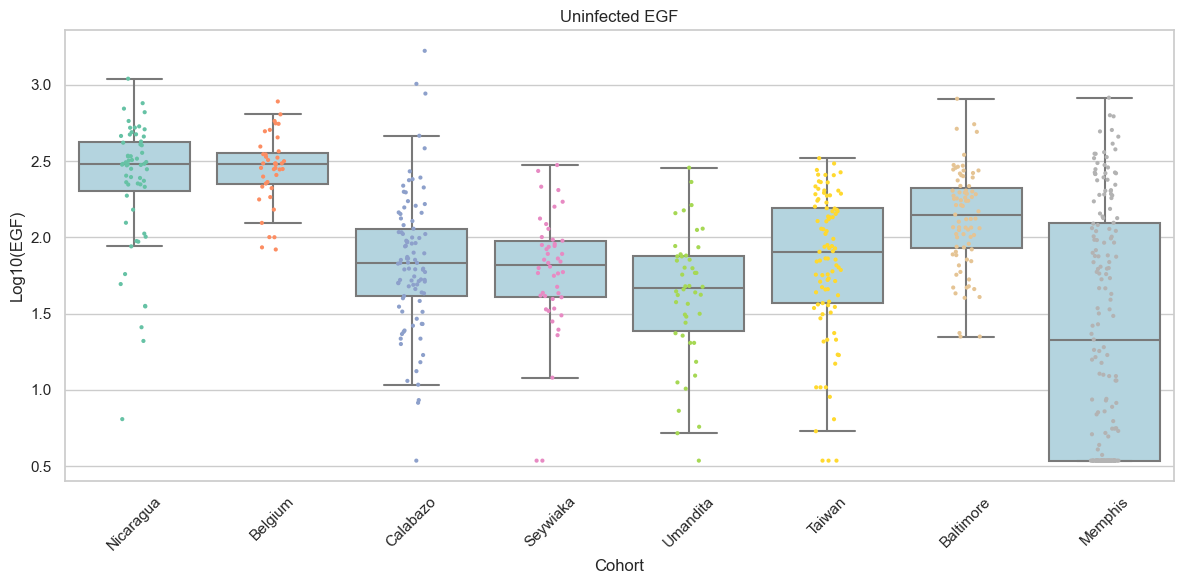

C:\Users\jorda\AppData\Local\Temp\ipykernel_22728\2186932264.py:14: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.stripplot(x='Cohort', y=np.log10(data[cytokine].replace(0, np.nan)), data=data, size=3, jitter=True, palette='Set2')


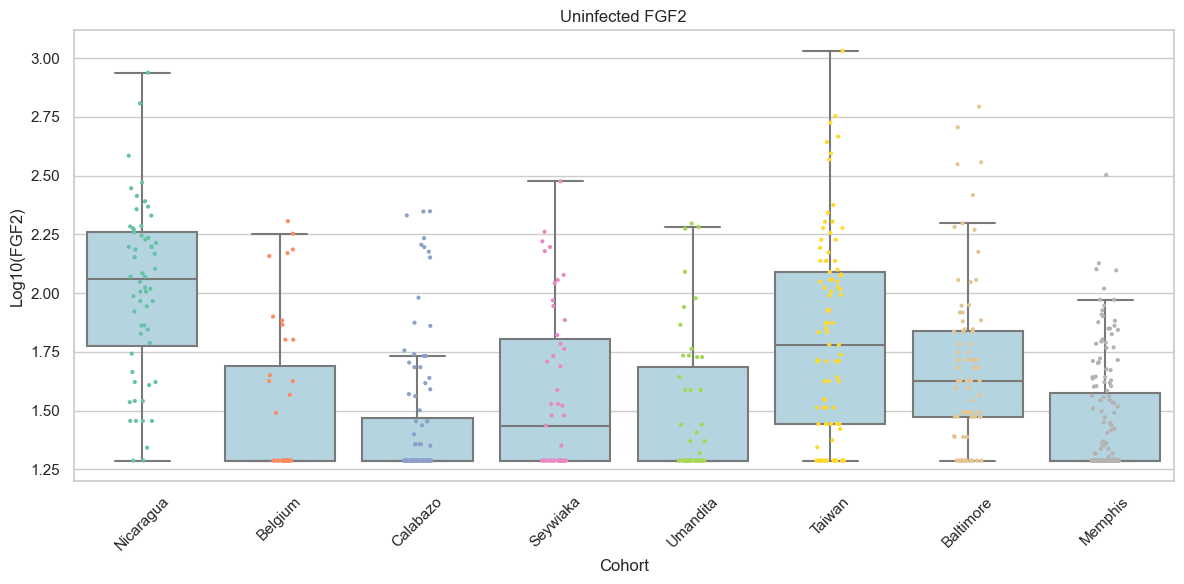

C:\Users\jorda\AppData\Local\Temp\ipykernel_22728\2186932264.py:14: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.stripplot(x='Cohort', y=np.log10(data[cytokine].replace(0, np.nan)), data=data, size=3, jitter=True, palette='Set2')


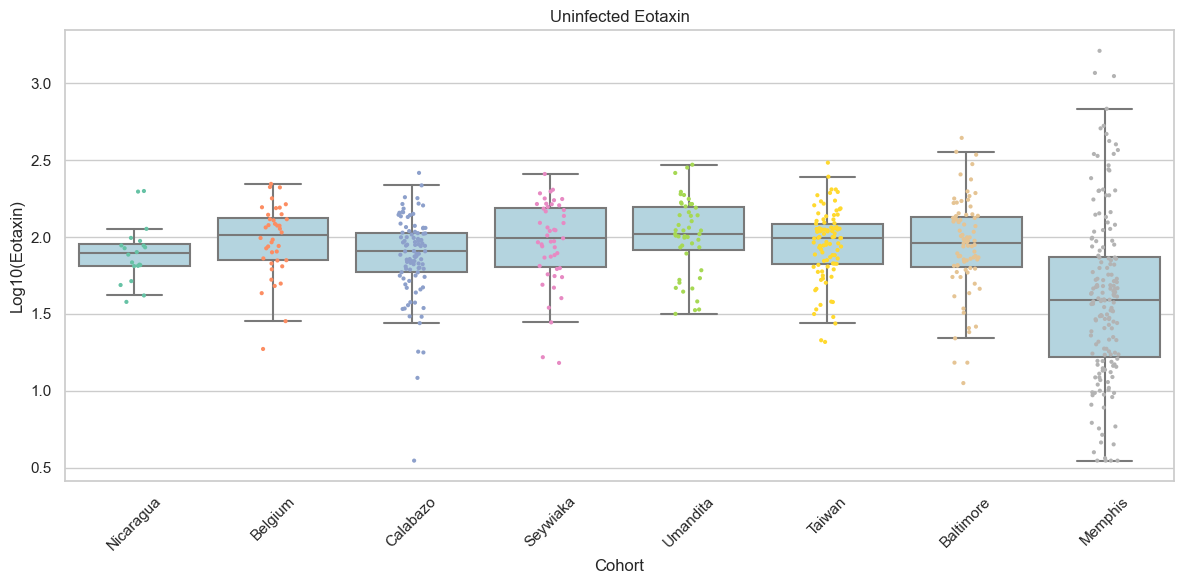

C:\Users\jorda\AppData\Local\Temp\ipykernel_22728\2186932264.py:14: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.stripplot(x='Cohort', y=np.log10(data[cytokine].replace(0, np.nan)), data=data, size=3, jitter=True, palette='Set2')


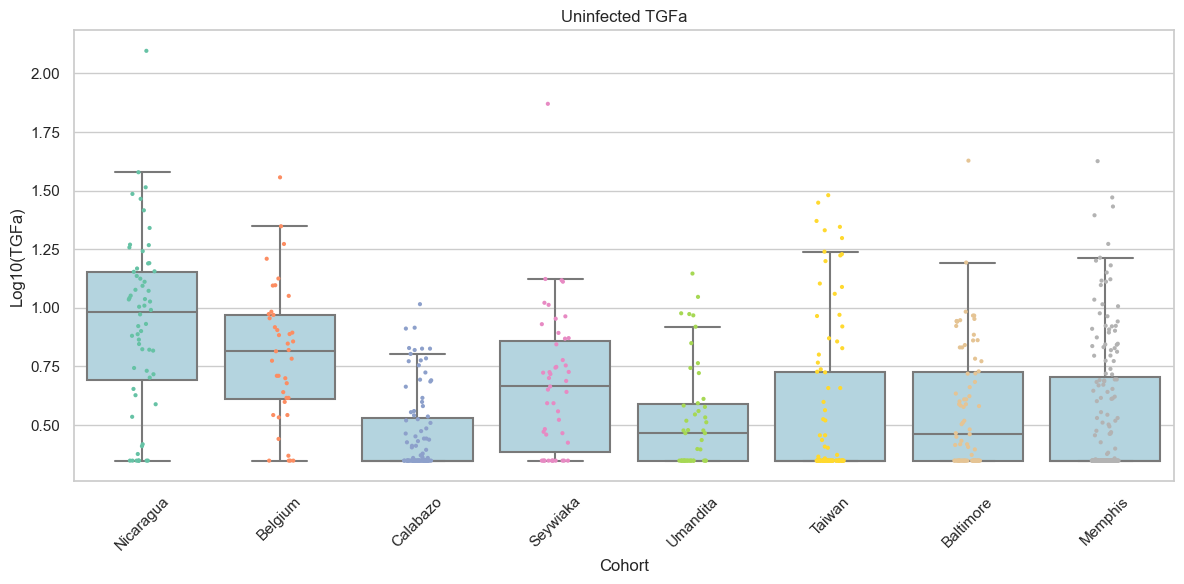

C:\Users\jorda\AppData\Local\Temp\ipykernel_22728\2186932264.py:14: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.stripplot(x='Cohort', y=np.log10(data[cytokine].replace(0, np.nan)), data=data, size=3, jitter=True, palette='Set2')


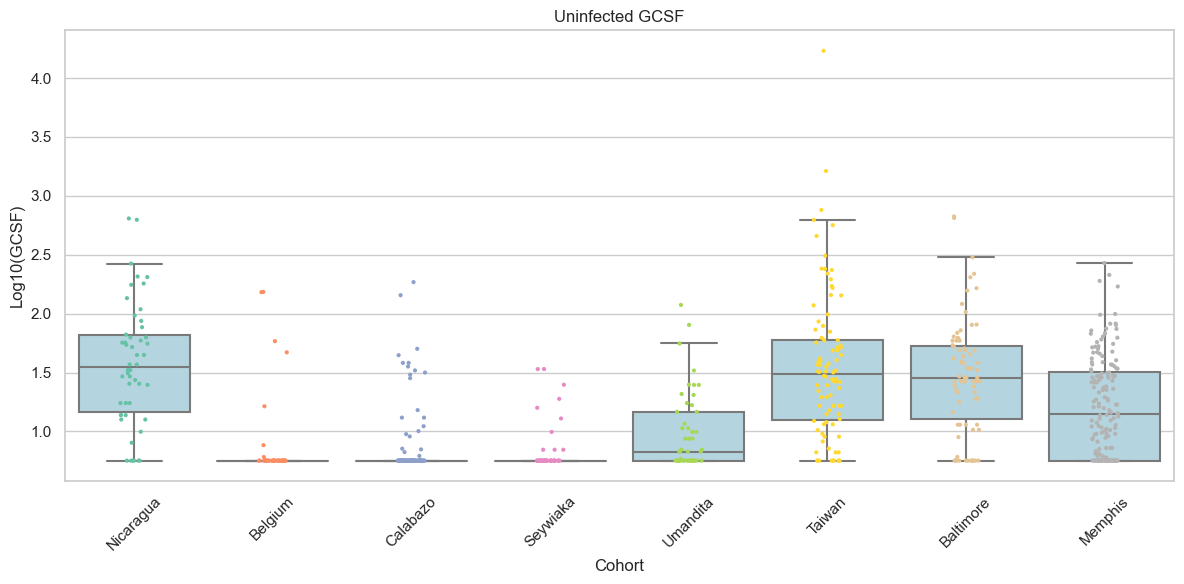

C:\Users\jorda\AppData\Local\Temp\ipykernel_22728\2186932264.py:14: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.stripplot(x='Cohort', y=np.log10(data[cytokine].replace(0, np.nan)), data=data, size=3, jitter=True, palette='Set2')


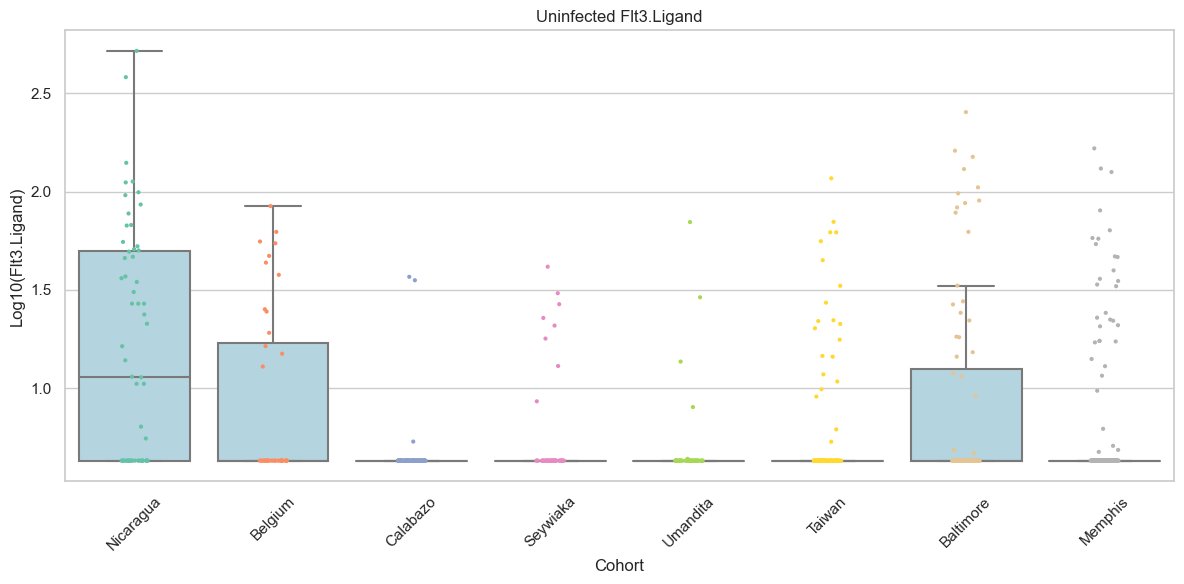

C:\Users\jorda\AppData\Local\Temp\ipykernel_22728\2186932264.py:14: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.stripplot(x='Cohort', y=np.log10(data[cytokine].replace(0, np.nan)), data=data, size=3, jitter=True, palette='Set2')


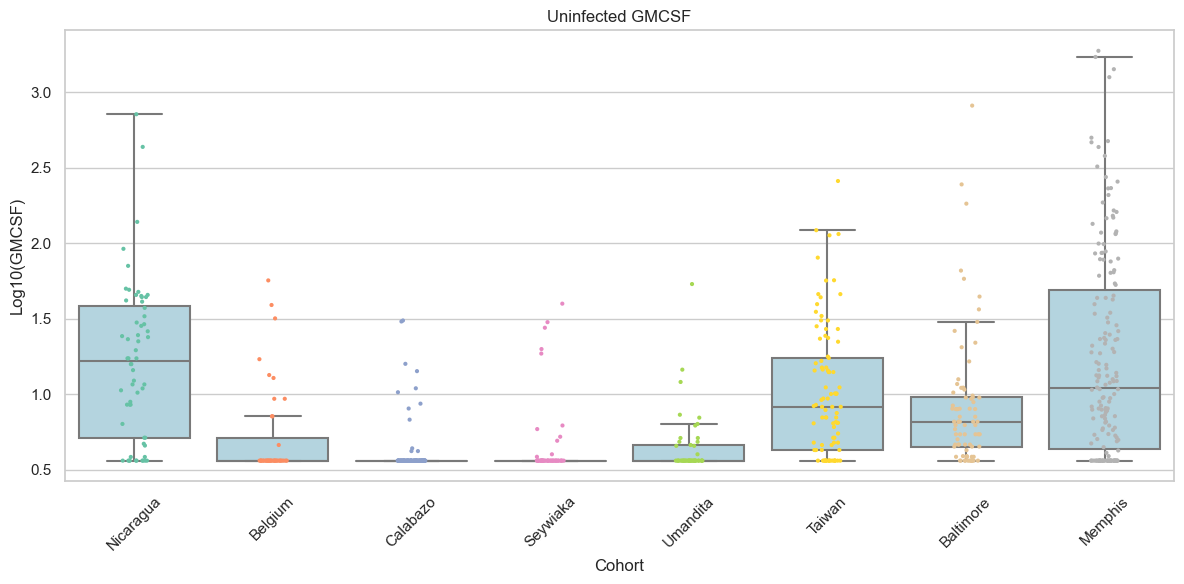

C:\Users\jorda\AppData\Local\Temp\ipykernel_22728\2186932264.py:14: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.stripplot(x='Cohort', y=np.log10(data[cytokine].replace(0, np.nan)), data=data, size=3, jitter=True, palette='Set2')


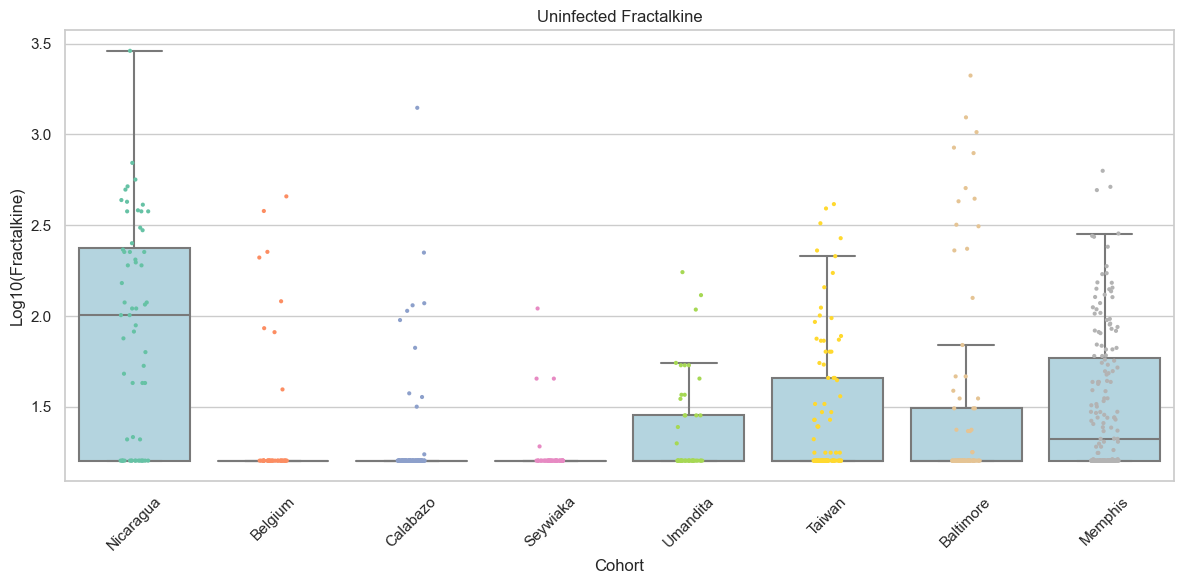

C:\Users\jorda\AppData\Local\Temp\ipykernel_22728\2186932264.py:14: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.stripplot(x='Cohort', y=np.log10(data[cytokine].replace(0, np.nan)), data=data, size=3, jitter=True, palette='Set2')


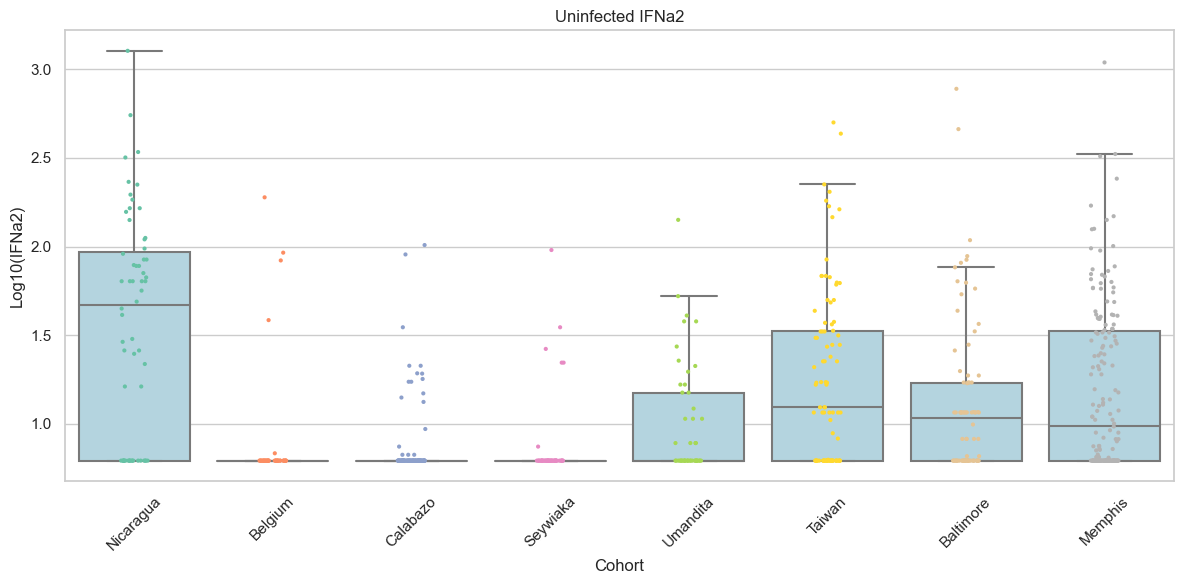

C:\Users\jorda\AppData\Local\Temp\ipykernel_22728\2186932264.py:14: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.stripplot(x='Cohort', y=np.log10(data[cytokine].replace(0, np.nan)), data=data, size=3, jitter=True, palette='Set2')


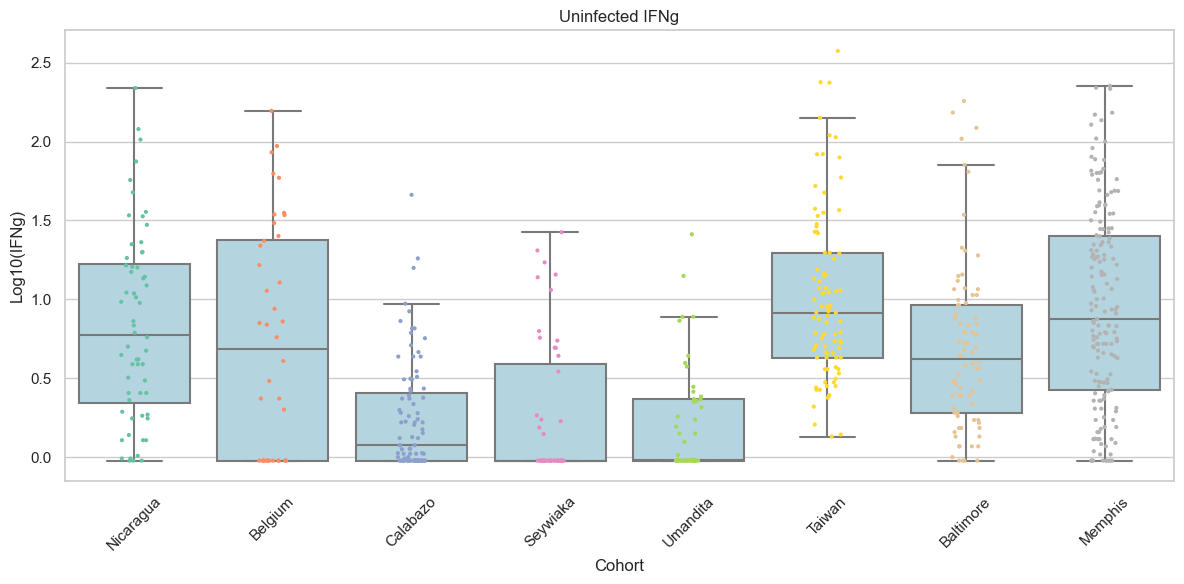

C:\Users\jorda\AppData\Local\Temp\ipykernel_22728\2186932264.py:14: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.stripplot(x='Cohort', y=np.log10(data[cytokine].replace(0, np.nan)), data=data, size=3, jitter=True, palette='Set2')


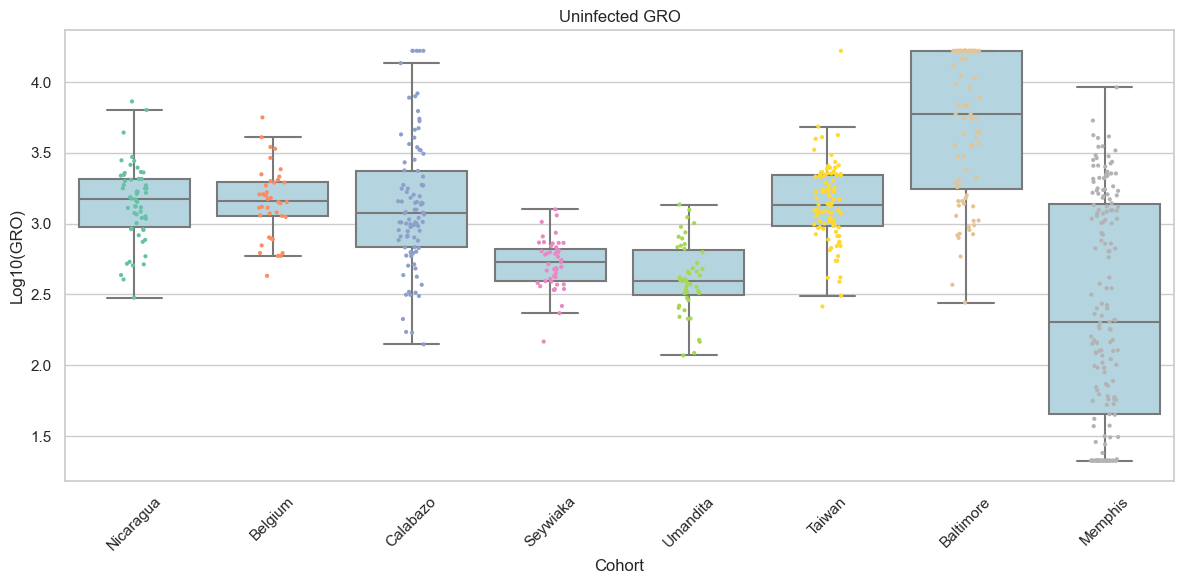

C:\Users\jorda\AppData\Local\Temp\ipykernel_22728\2186932264.py:14: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.stripplot(x='Cohort', y=np.log10(data[cytokine].replace(0, np.nan)), data=data, size=3, jitter=True, palette='Set2')


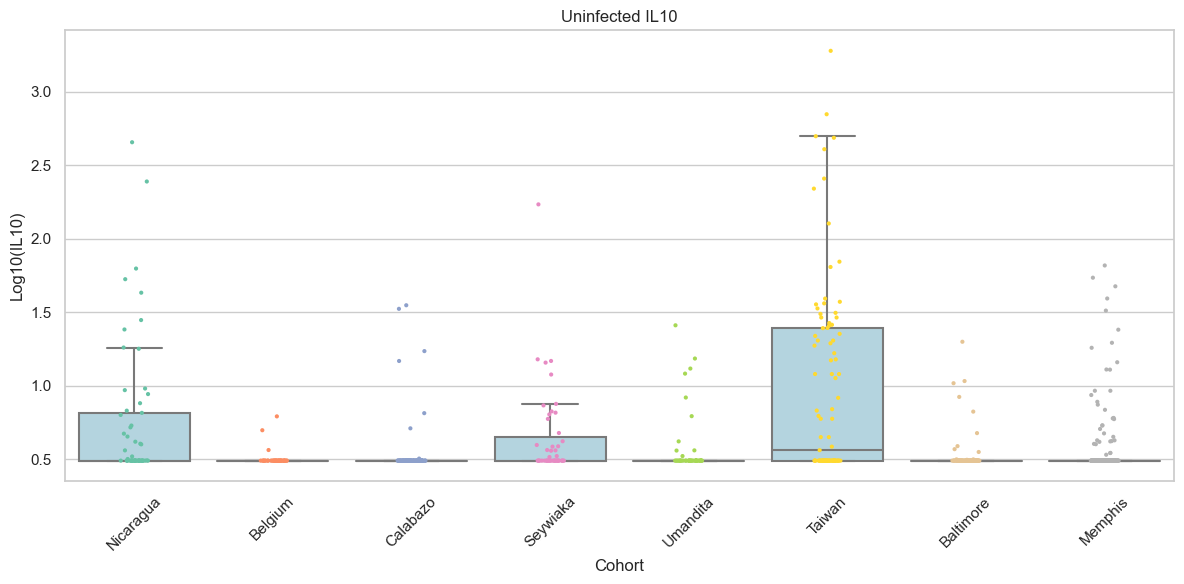

C:\Users\jorda\AppData\Local\Temp\ipykernel_22728\2186932264.py:14: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.stripplot(x='Cohort', y=np.log10(data[cytokine].replace(0, np.nan)), data=data, size=3, jitter=True, palette='Set2')


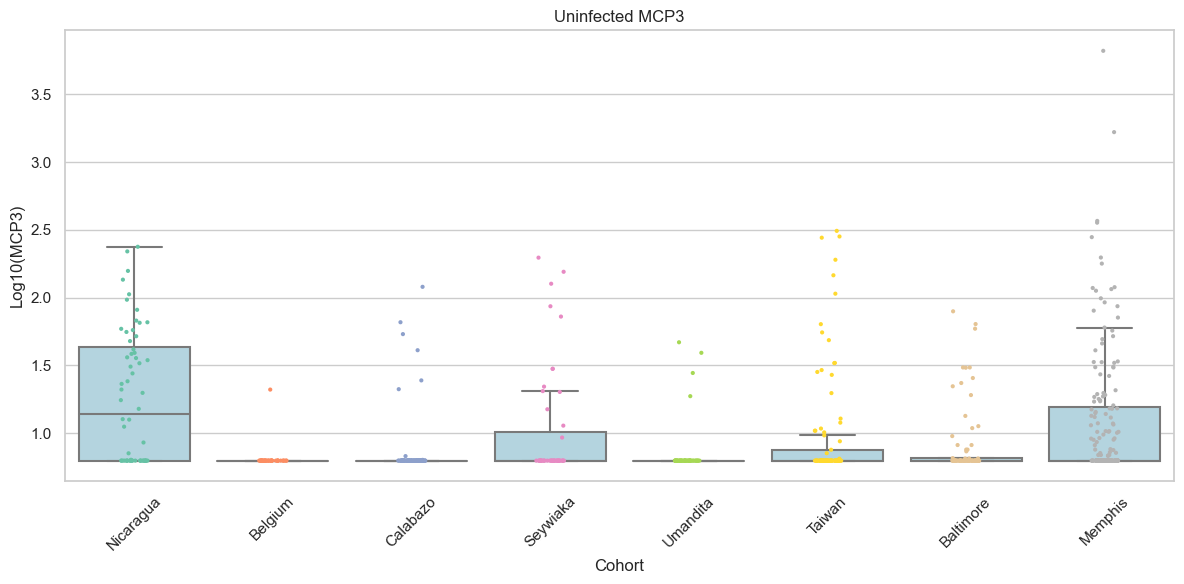

C:\Users\jorda\AppData\Local\Temp\ipykernel_22728\2186932264.py:14: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.stripplot(x='Cohort', y=np.log10(data[cytokine].replace(0, np.nan)), data=data, size=3, jitter=True, palette='Set2')


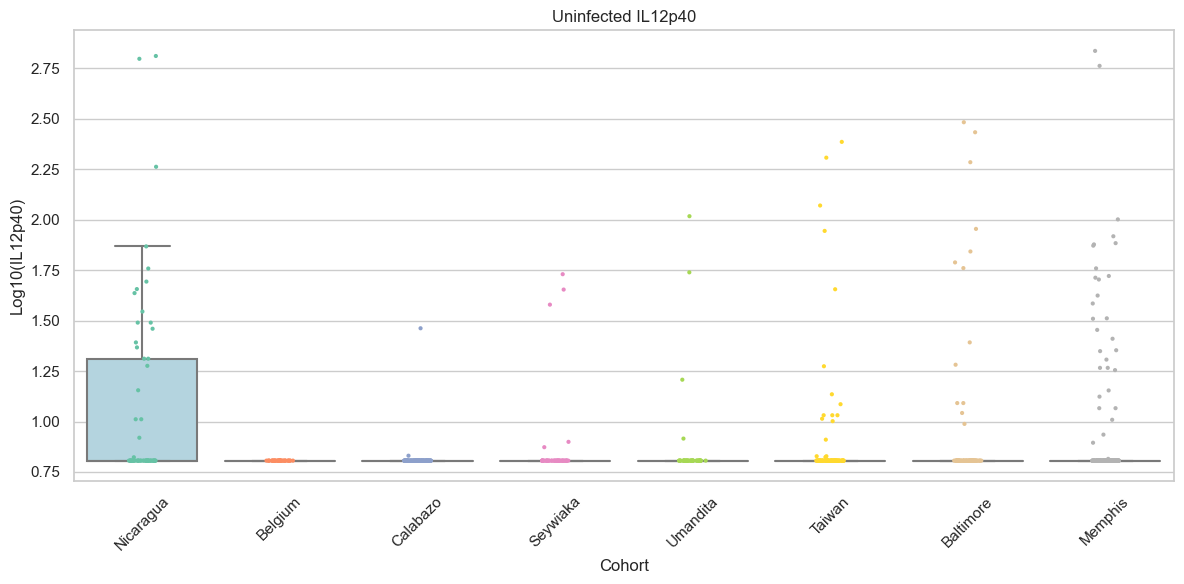

C:\Users\jorda\AppData\Local\Temp\ipykernel_22728\2186932264.py:14: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.stripplot(x='Cohort', y=np.log10(data[cytokine].replace(0, np.nan)), data=data, size=3, jitter=True, palette='Set2')


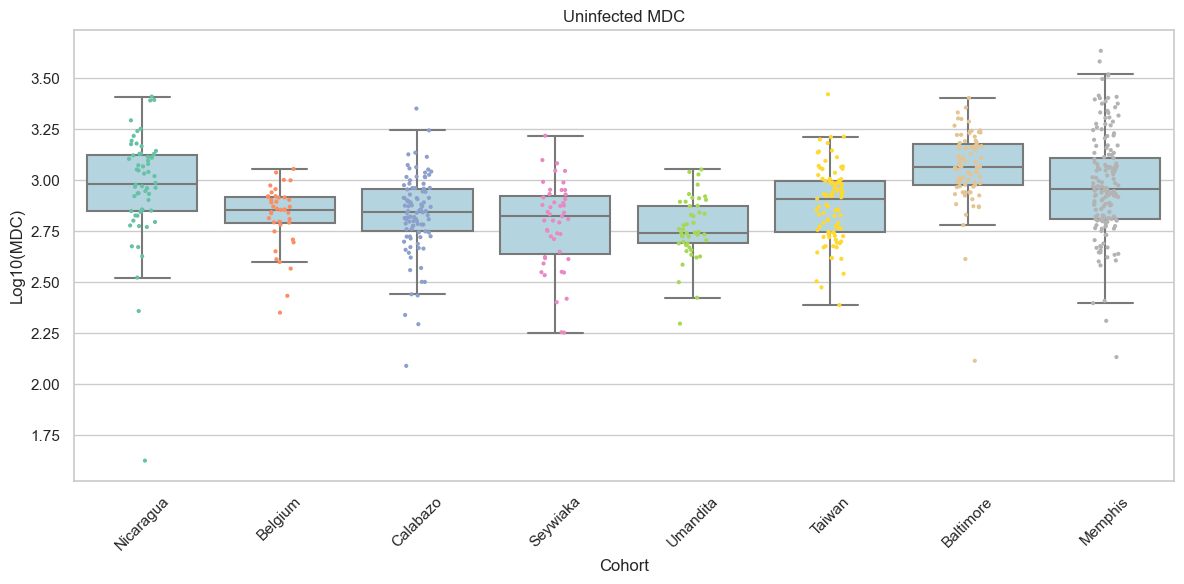

C:\Users\jorda\AppData\Local\Temp\ipykernel_22728\2186932264.py:14: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.stripplot(x='Cohort', y=np.log10(data[cytokine].replace(0, np.nan)), data=data, size=3, jitter=True, palette='Set2')


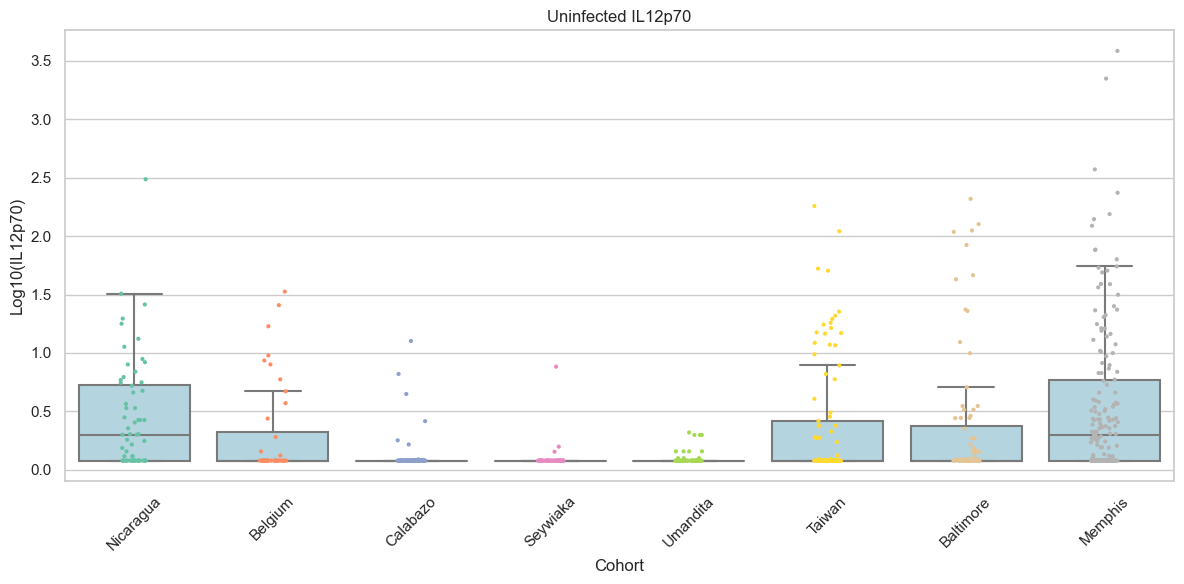

C:\Users\jorda\AppData\Local\Temp\ipykernel_22728\2186932264.py:14: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.stripplot(x='Cohort', y=np.log10(data[cytokine].replace(0, np.nan)), data=data, size=3, jitter=True, palette='Set2')


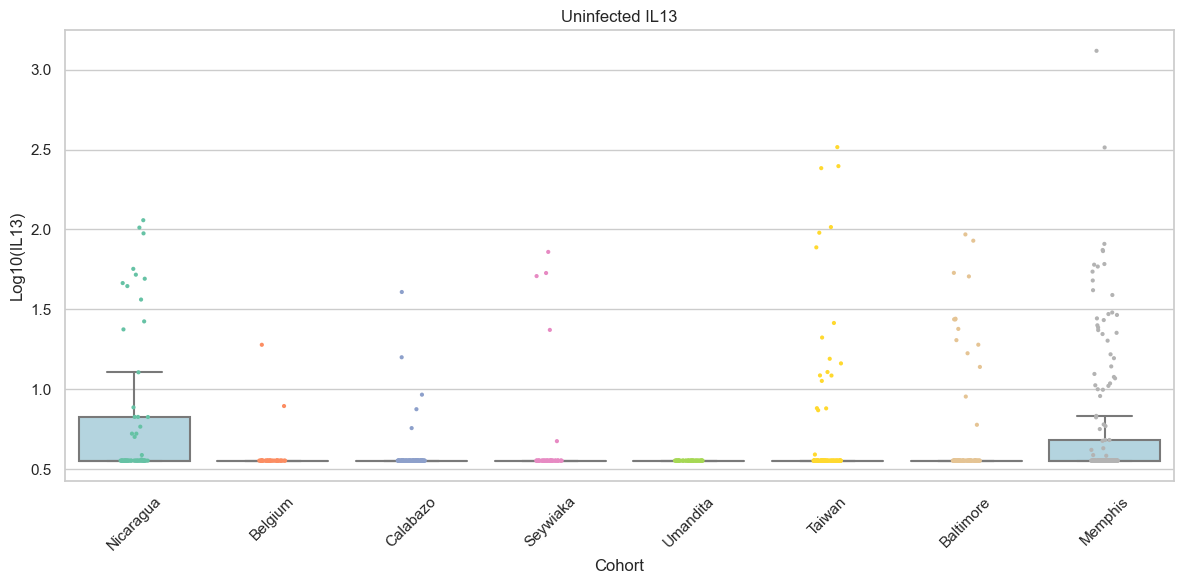

C:\Users\jorda\AppData\Local\Temp\ipykernel_22728\2186932264.py:14: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.stripplot(x='Cohort', y=np.log10(data[cytokine].replace(0, np.nan)), data=data, size=3, jitter=True, palette='Set2')


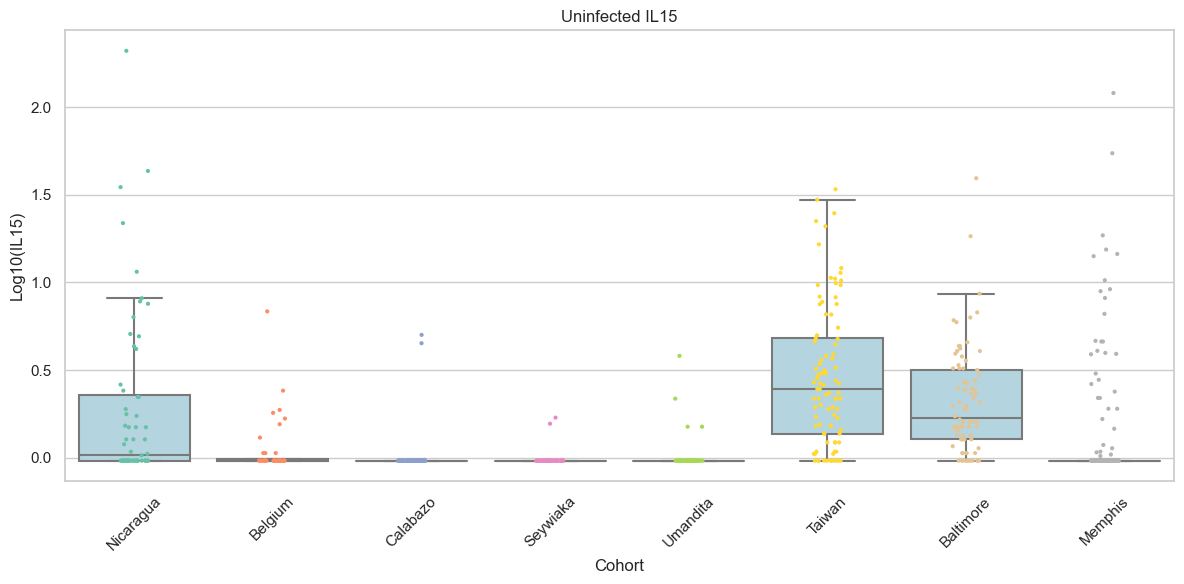

C:\Users\jorda\AppData\Local\Temp\ipykernel_22728\2186932264.py:14: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.stripplot(x='Cohort', y=np.log10(data[cytokine].replace(0, np.nan)), data=data, size=3, jitter=True, palette='Set2')


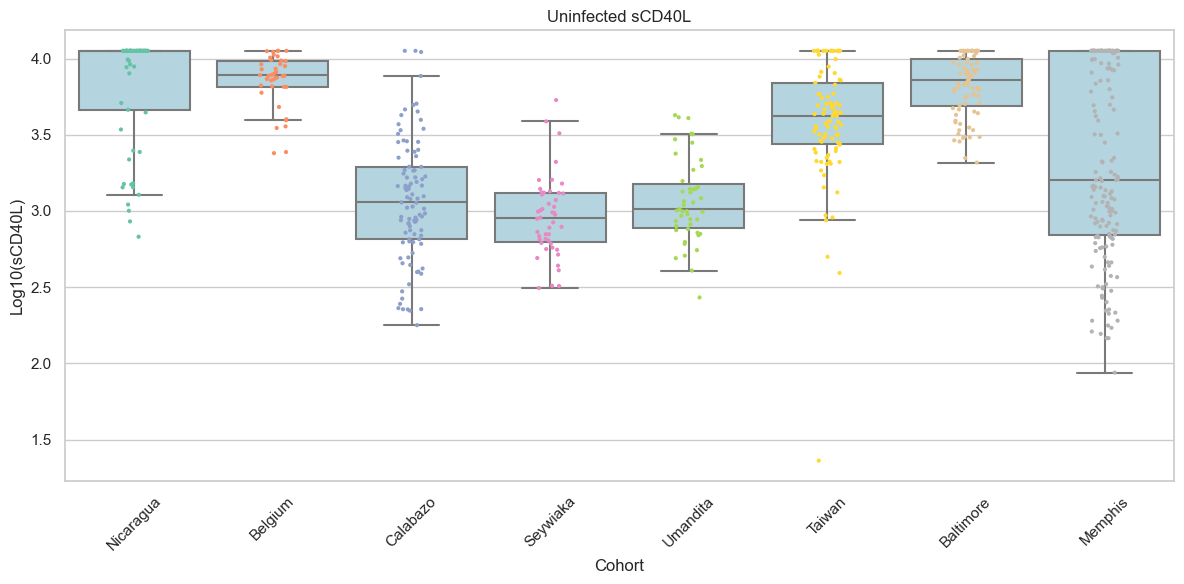

C:\Users\jorda\AppData\Local\Temp\ipykernel_22728\2186932264.py:14: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.stripplot(x='Cohort', y=np.log10(data[cytokine].replace(0, np.nan)), data=data, size=3, jitter=True, palette='Set2')


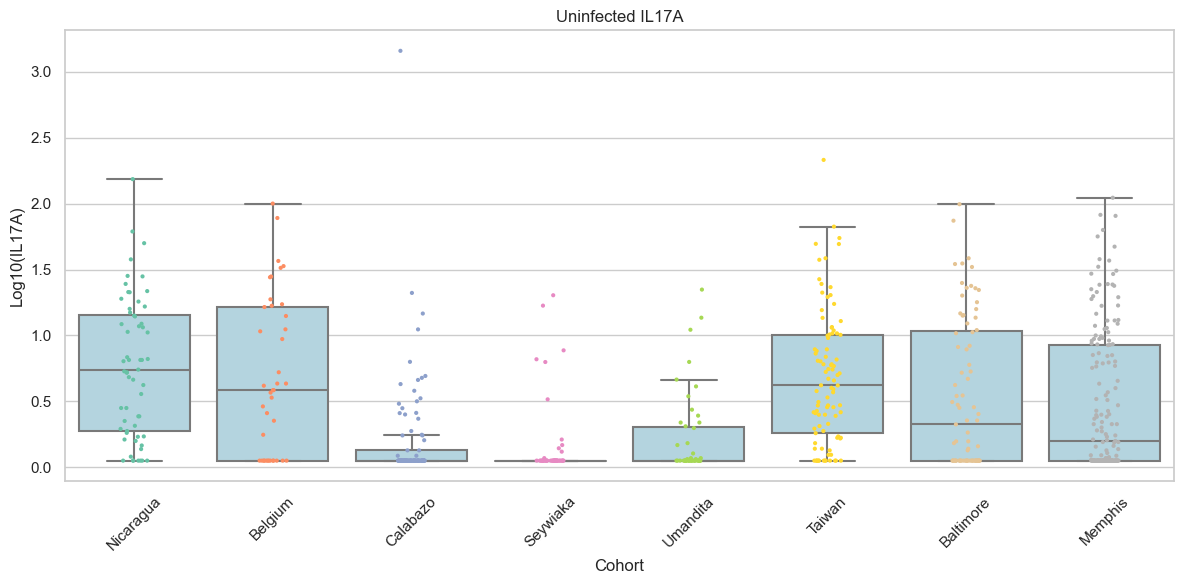

C:\Users\jorda\AppData\Local\Temp\ipykernel_22728\2186932264.py:14: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.stripplot(x='Cohort', y=np.log10(data[cytokine].replace(0, np.nan)), data=data, size=3, jitter=True, palette='Set2')


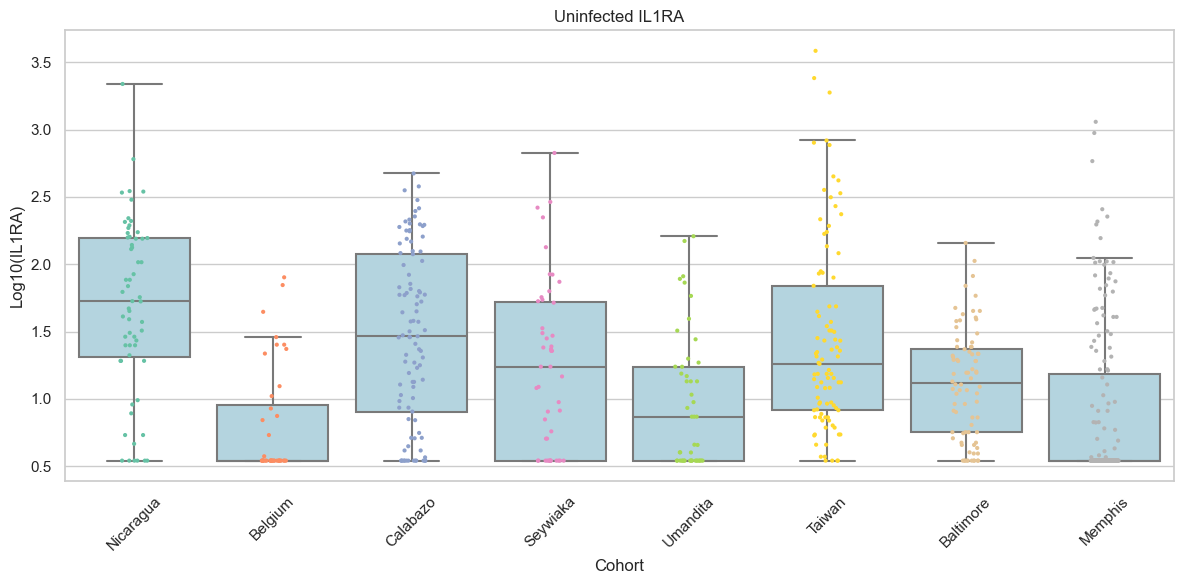

C:\Users\jorda\AppData\Local\Temp\ipykernel_22728\2186932264.py:14: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.stripplot(x='Cohort', y=np.log10(data[cytokine].replace(0, np.nan)), data=data, size=3, jitter=True, palette='Set2')


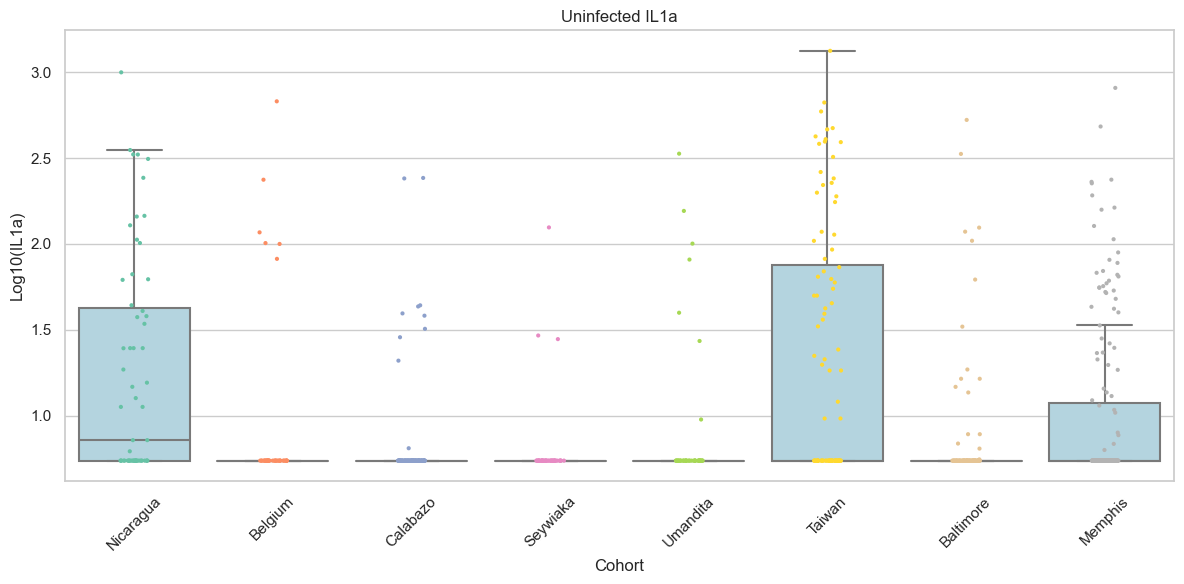

C:\Users\jorda\AppData\Local\Temp\ipykernel_22728\2186932264.py:14: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.stripplot(x='Cohort', y=np.log10(data[cytokine].replace(0, np.nan)), data=data, size=3, jitter=True, palette='Set2')


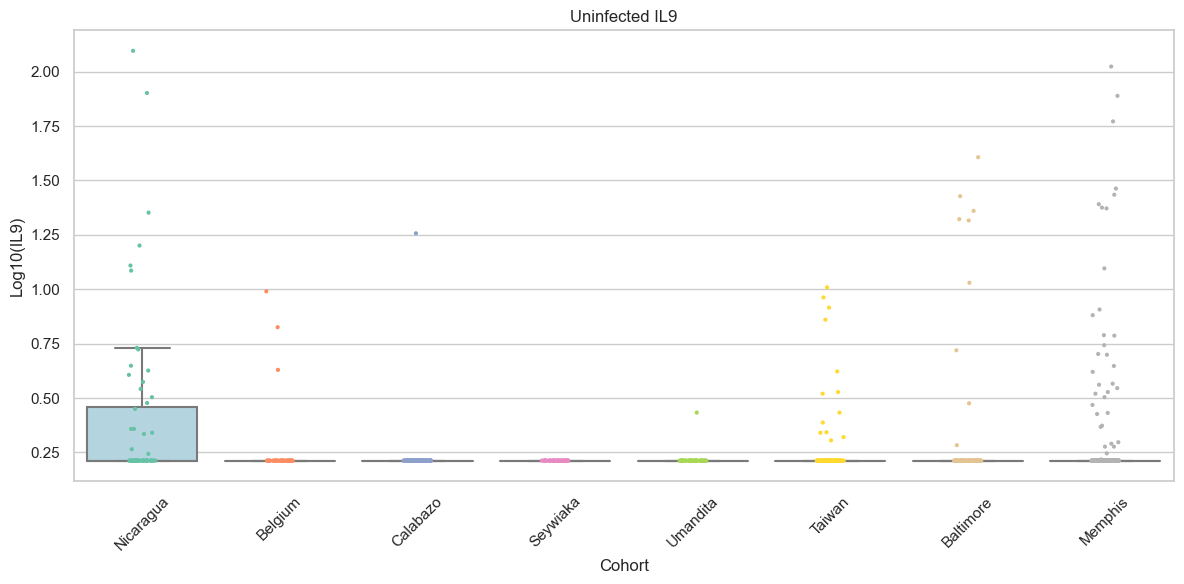

C:\Users\jorda\AppData\Local\Temp\ipykernel_22728\2186932264.py:14: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.stripplot(x='Cohort', y=np.log10(data[cytokine].replace(0, np.nan)), data=data, size=3, jitter=True, palette='Set2')


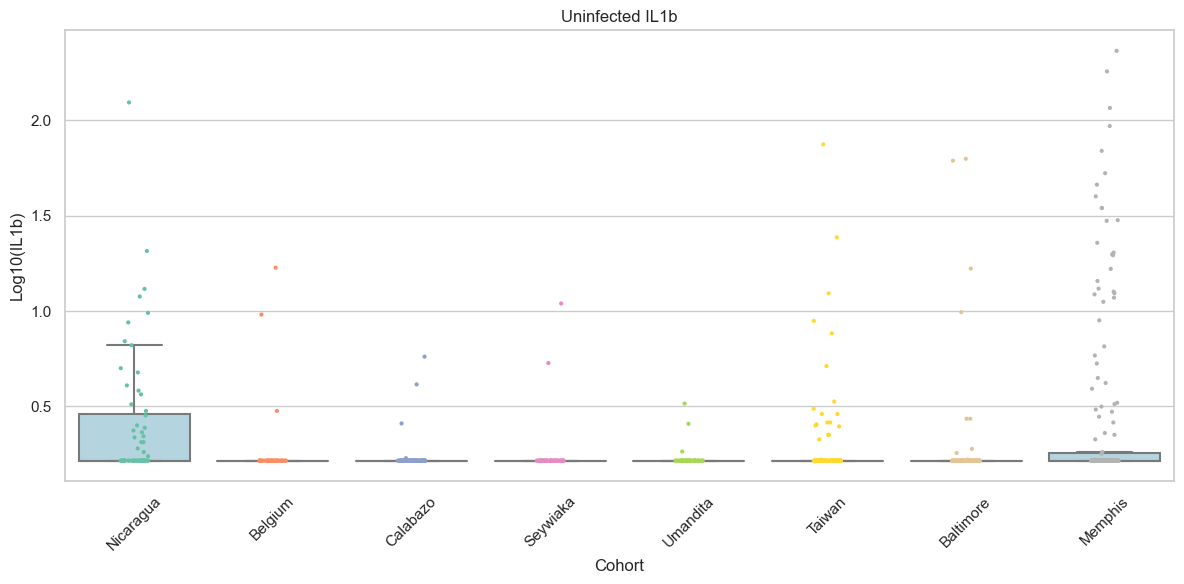

C:\Users\jorda\AppData\Local\Temp\ipykernel_22728\2186932264.py:14: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.stripplot(x='Cohort', y=np.log10(data[cytokine].replace(0, np.nan)), data=data, size=3, jitter=True, palette='Set2')


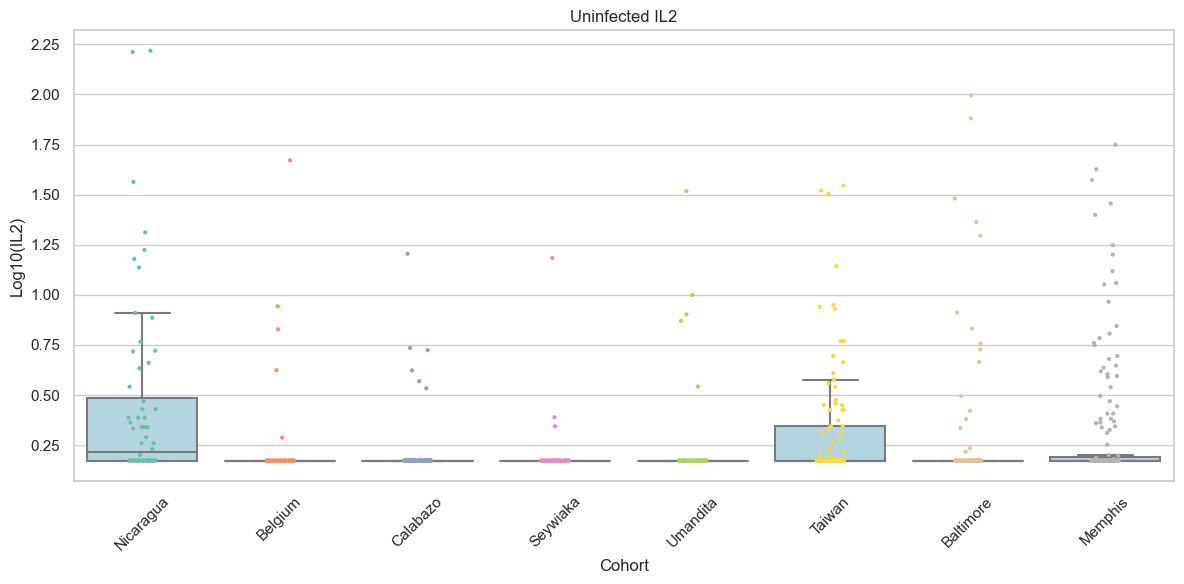

C:\Users\jorda\AppData\Local\Temp\ipykernel_22728\2186932264.py:14: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.stripplot(x='Cohort', y=np.log10(data[cytokine].replace(0, np.nan)), data=data, size=3, jitter=True, palette='Set2')


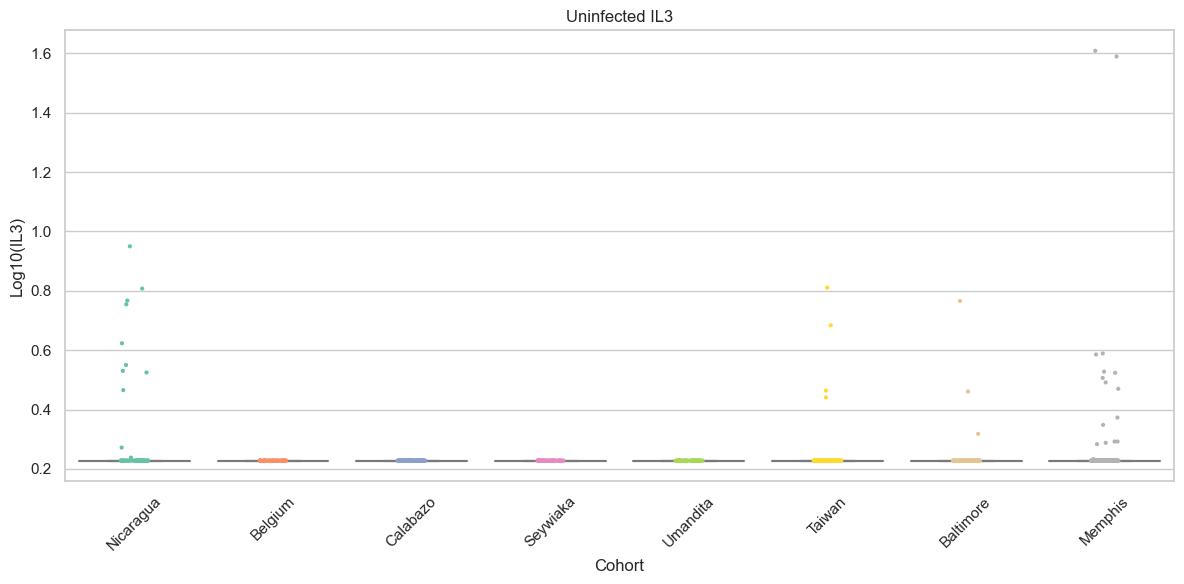

C:\Users\jorda\AppData\Local\Temp\ipykernel_22728\2186932264.py:14: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.stripplot(x='Cohort', y=np.log10(data[cytokine].replace(0, np.nan)), data=data, size=3, jitter=True, palette='Set2')


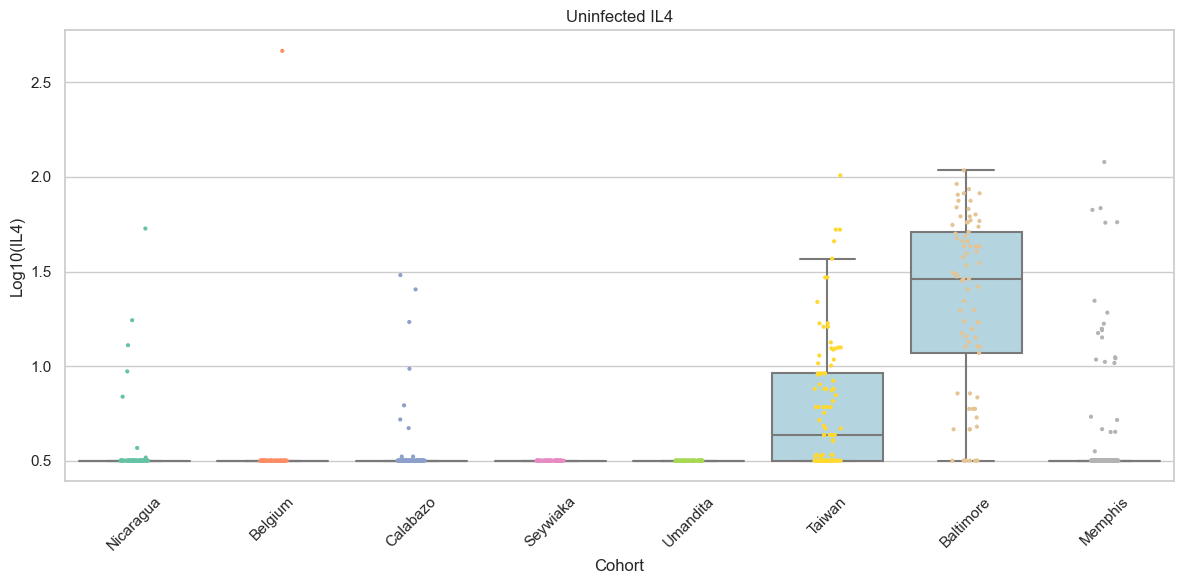

C:\Users\jorda\AppData\Local\Temp\ipykernel_22728\2186932264.py:14: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.stripplot(x='Cohort', y=np.log10(data[cytokine].replace(0, np.nan)), data=data, size=3, jitter=True, palette='Set2')


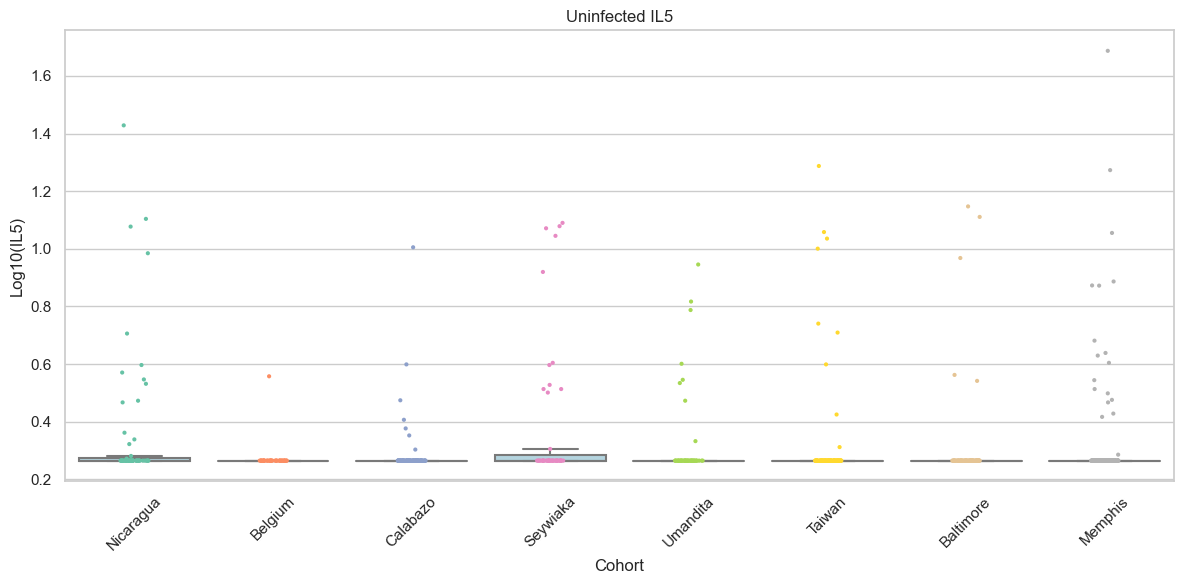

C:\Users\jorda\AppData\Local\Temp\ipykernel_22728\2186932264.py:14: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.stripplot(x='Cohort', y=np.log10(data[cytokine].replace(0, np.nan)), data=data, size=3, jitter=True, palette='Set2')


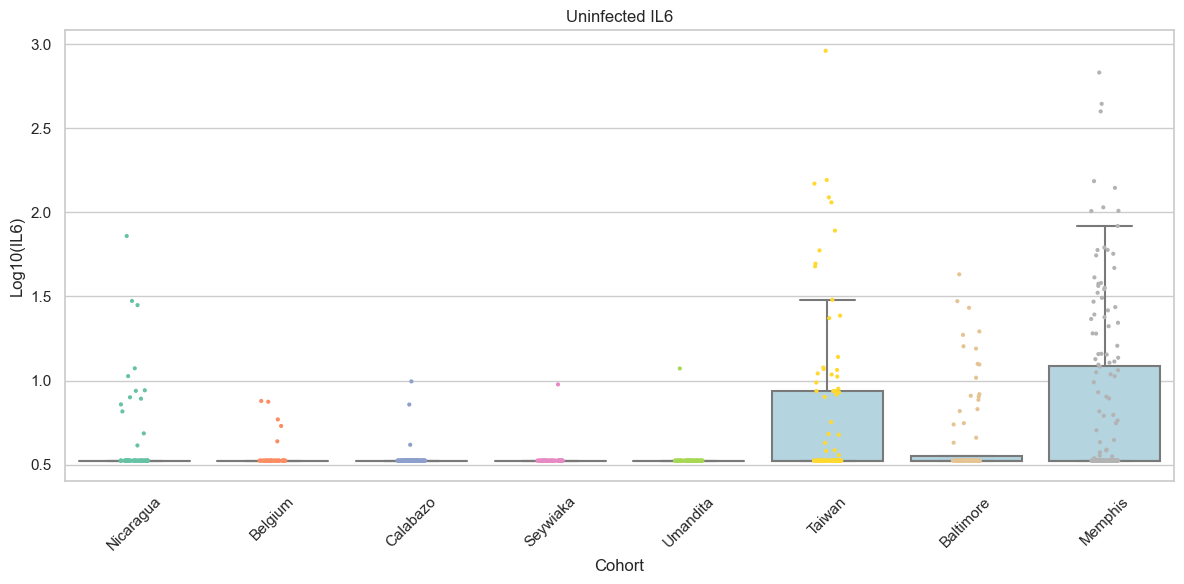

C:\Users\jorda\AppData\Local\Temp\ipykernel_22728\2186932264.py:14: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.stripplot(x='Cohort', y=np.log10(data[cytokine].replace(0, np.nan)), data=data, size=3, jitter=True, palette='Set2')


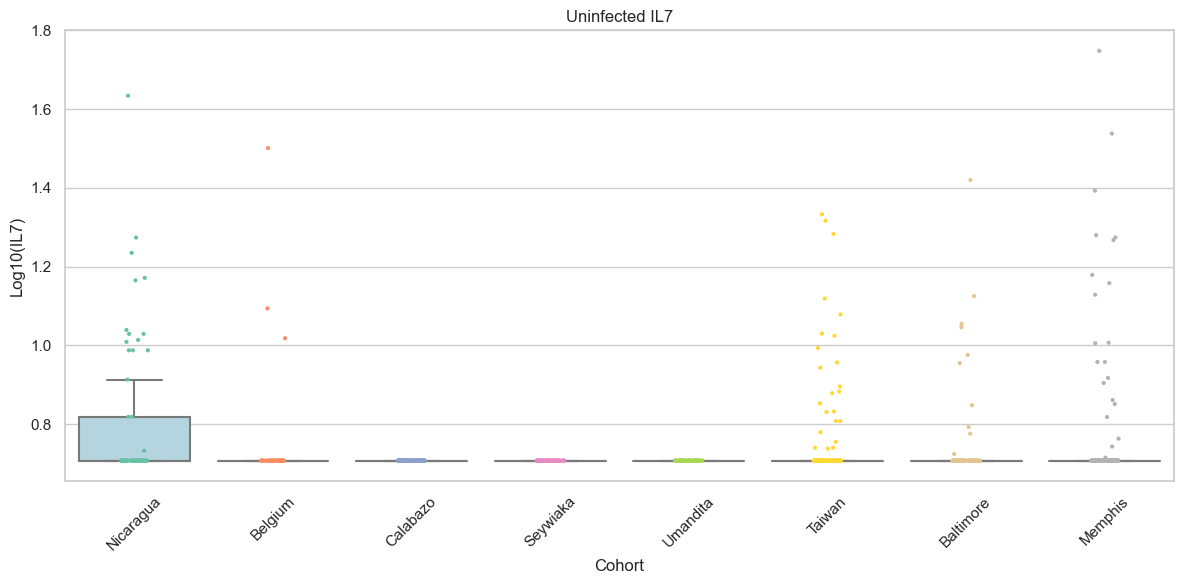

C:\Users\jorda\AppData\Local\Temp\ipykernel_22728\2186932264.py:14: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.stripplot(x='Cohort', y=np.log10(data[cytokine].replace(0, np.nan)), data=data, size=3, jitter=True, palette='Set2')


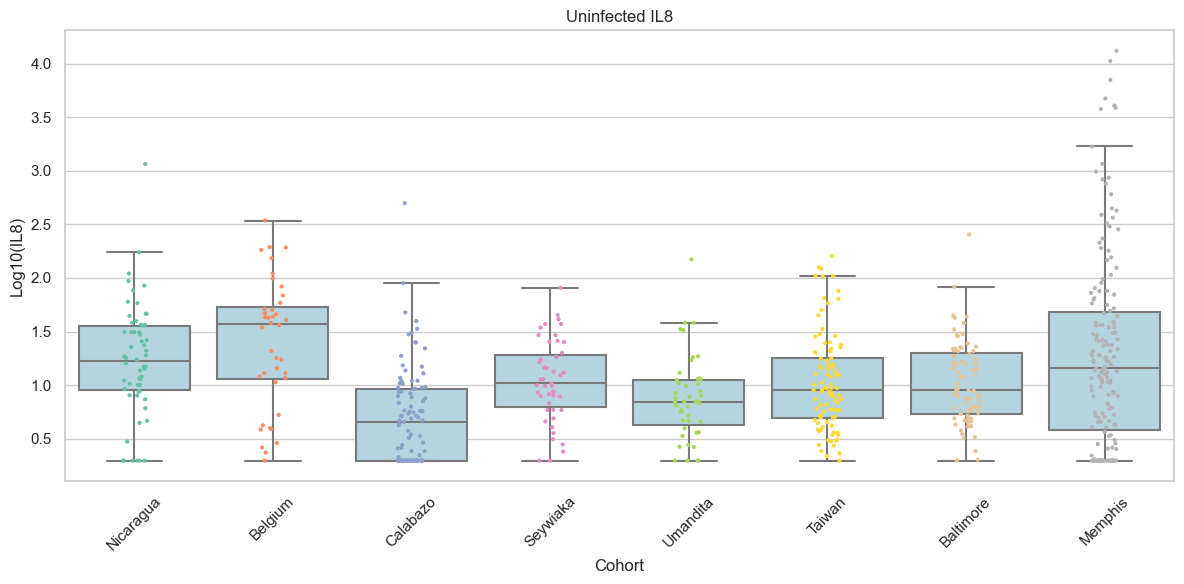

C:\Users\jorda\AppData\Local\Temp\ipykernel_22728\2186932264.py:14: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.stripplot(x='Cohort', y=np.log10(data[cytokine].replace(0, np.nan)), data=data, size=3, jitter=True, palette='Set2')


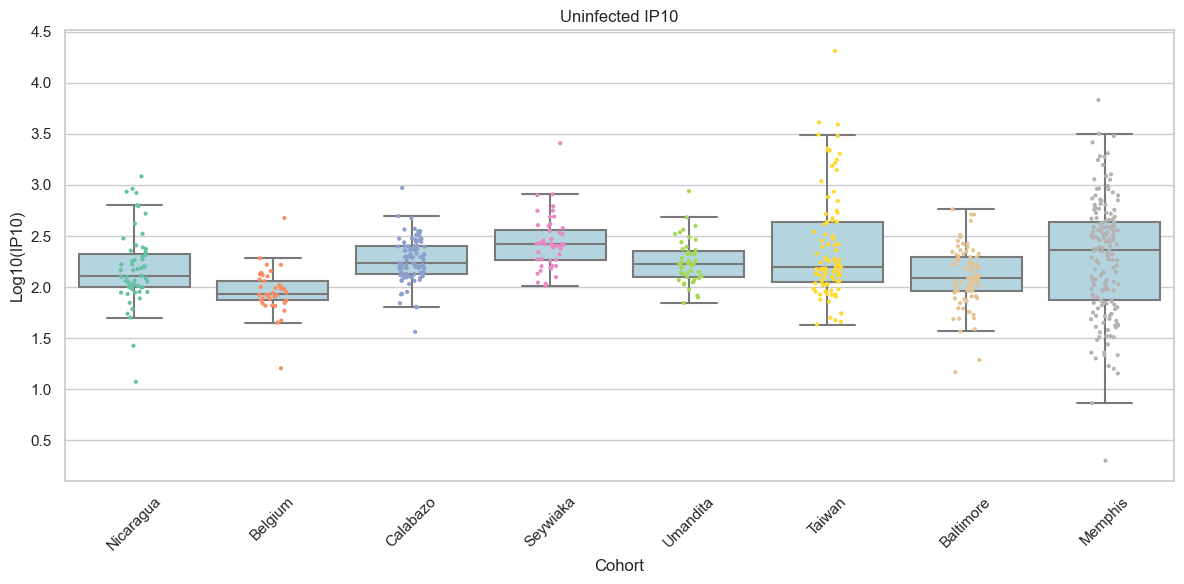

C:\Users\jorda\AppData\Local\Temp\ipykernel_22728\2186932264.py:14: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.stripplot(x='Cohort', y=np.log10(data[cytokine].replace(0, np.nan)), data=data, size=3, jitter=True, palette='Set2')


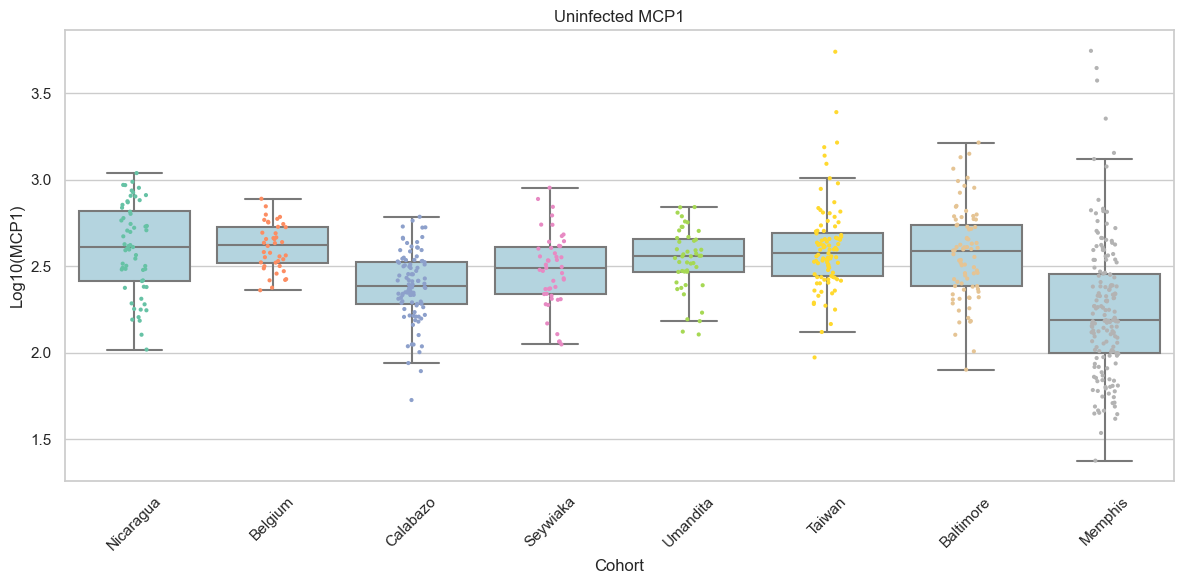

C:\Users\jorda\AppData\Local\Temp\ipykernel_22728\2186932264.py:14: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.stripplot(x='Cohort', y=np.log10(data[cytokine].replace(0, np.nan)), data=data, size=3, jitter=True, palette='Set2')


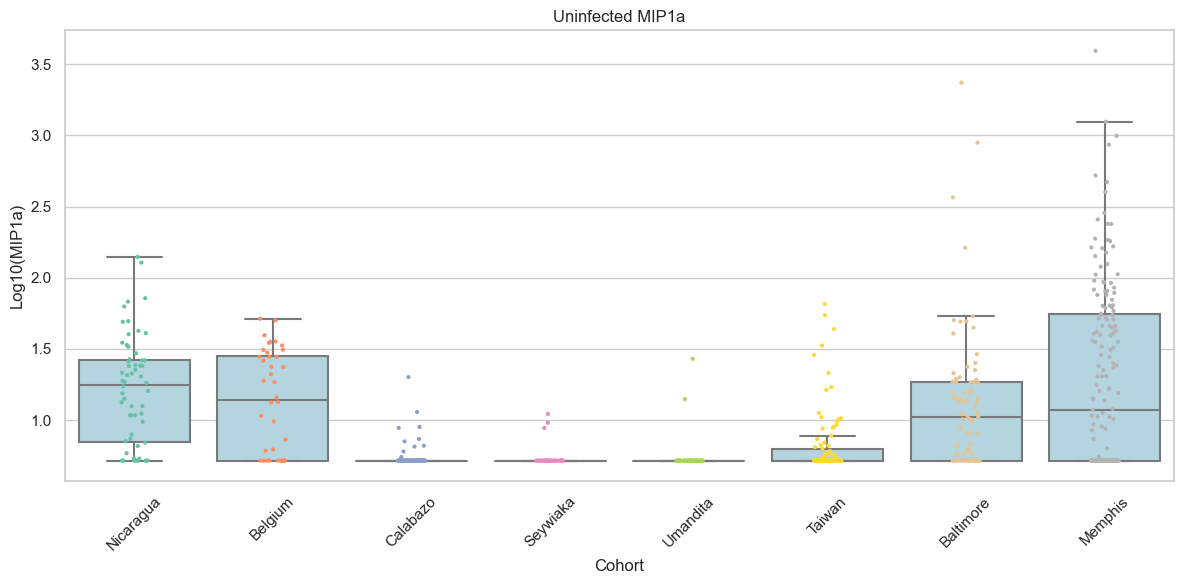

C:\Users\jorda\AppData\Local\Temp\ipykernel_22728\2186932264.py:14: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.stripplot(x='Cohort', y=np.log10(data[cytokine].replace(0, np.nan)), data=data, size=3, jitter=True, palette='Set2')


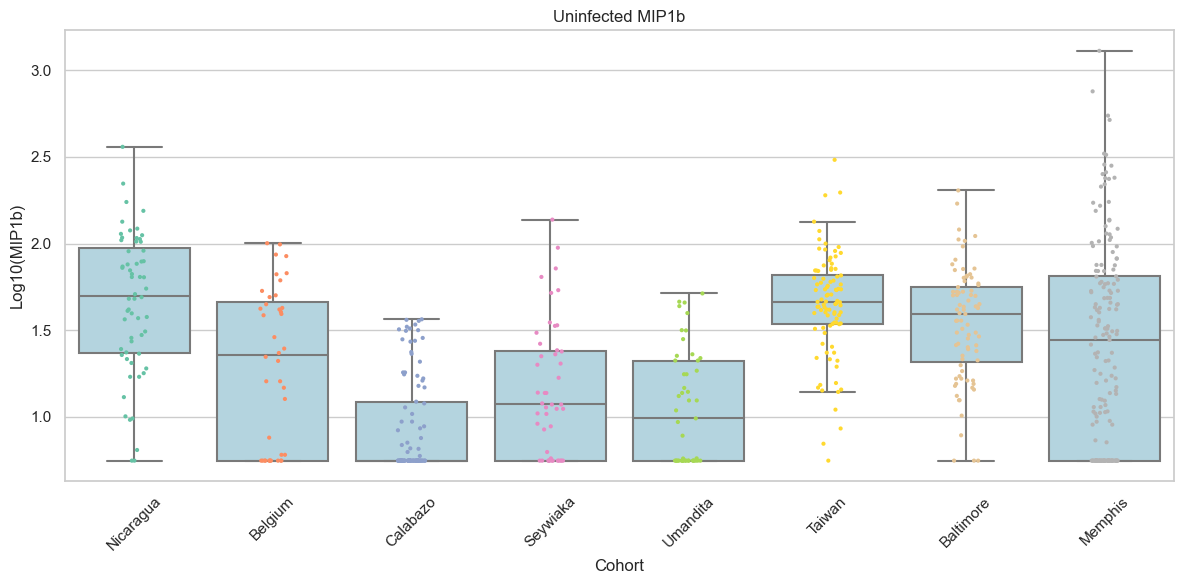

C:\Users\jorda\AppData\Local\Temp\ipykernel_22728\2186932264.py:14: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.stripplot(x='Cohort', y=np.log10(data[cytokine].replace(0, np.nan)), data=data, size=3, jitter=True, palette='Set2')


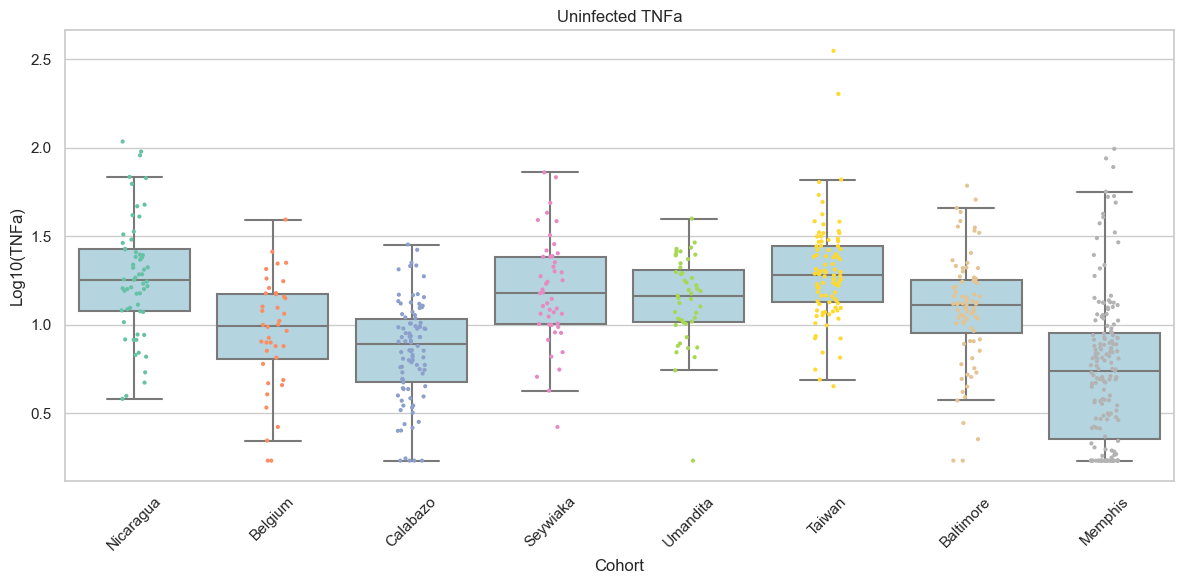

C:\Users\jorda\AppData\Local\Temp\ipykernel_22728\2186932264.py:14: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.stripplot(x='Cohort', y=np.log10(data[cytokine].replace(0, np.nan)), data=data, size=3, jitter=True, palette='Set2')


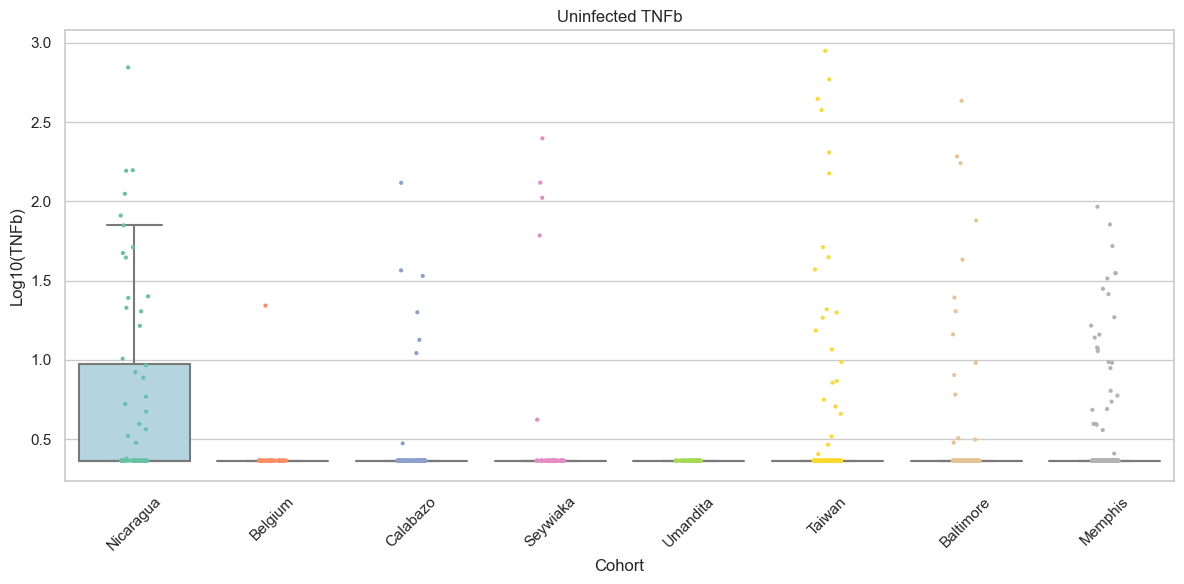

C:\Users\jorda\AppData\Local\Temp\ipykernel_22728\2186932264.py:14: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.stripplot(x='Cohort', y=np.log10(data[cytokine].replace(0, np.nan)), data=data, size=3, jitter=True, palette='Set2')


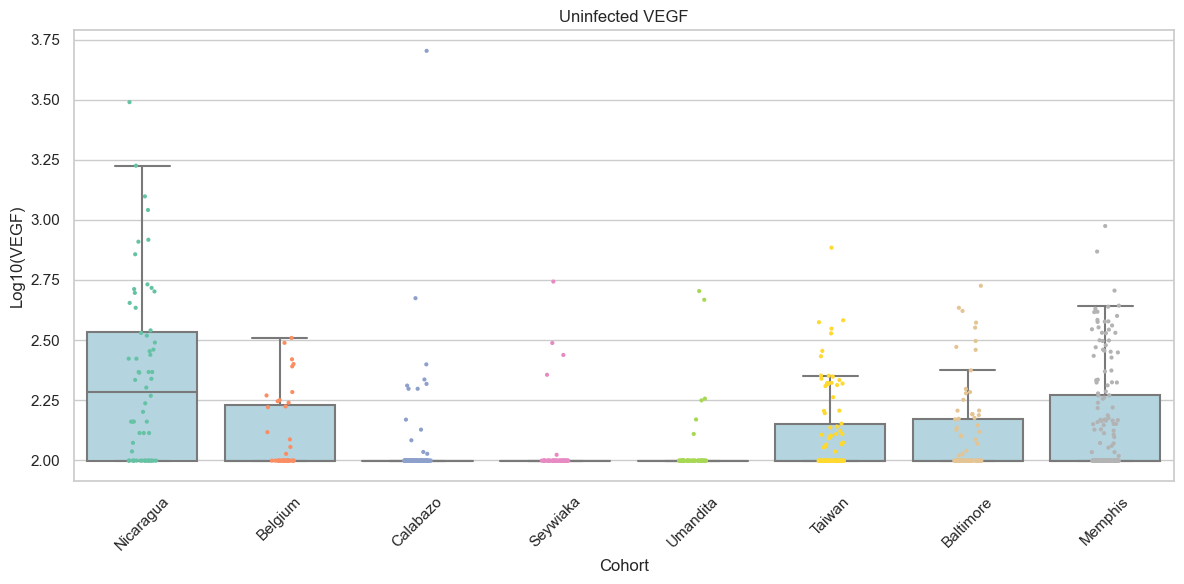

'figures/uninfected/cytokines/cohort_specific/'

In [46]:
data = pd.read_excel(file_path)
cytokine_data = data.drop(columns=['Cohort', 'ID', 'Plate'])

# Creating a directory for the plots
plot_dir = 'figures/uninfected/cytokines/cohort_specific/'
os.makedirs(plot_dir, exist_ok=True)

# Iterating through all cytokines
for cytokine in cytokine_data.columns:
    plt.figure(figsize=(12, 6))
    # Global boxplot
    sns.boxplot(x='Cohort', y=np.log10(data[cytokine].replace(0, np.nan)), data=data, color='lightblue', fliersize=0)
    # Cohort-specific strip plot with individual data points
    sns.stripplot(x='Cohort', y=np.log10(data[cytokine].replace(0, np.nan)), data=data, size=3, jitter=True, palette='Set2')
    plt.title(f'Uninfected {cytokine}')
    plt.ylabel(f'Log10({cytokine})')
    plt.xticks(rotation=45)
    plt.tight_layout()
    # Save the plot
    plt.savefig(plot_dir + f'{cytokine}_log10.png')
    plt.show()
    plt.close()

plot_dir

In [ ]:
# Performing the ANOVA analysis and visualization
anova_results, significant_cytokines, plot_dir = perform_anova_and_visualize(data, cytokine_data.columns)

# Save the ANOVA results to a file
anova_results_df = pd.DataFrame(anova_results).T
anova_results_df.columns = ['F-Statistic', 'P-Value']
anova_results_file = 'analysis/uninfected/cohort_anova_results.csv'
anova_results_df.to_csv(anova_results_file)

anova_results_file, plot_dir, significant_cytokines

('analysis/uninfected/anova_results.csv',
 'figures/uninfected/anova_plots/',
 ['EGF',
  'FGF2',
  'TGFa',
  'Flt3.Ligand',
  'GMCSF',
  'Fractalkine',
  'IFNa2',
  'IFNg',
  'GRO',
  'IL10',
  'IL12p40',
  'MDC',
  'IL15',
  'sCD40L',
  'IL1RA',
  'IL1a',
  'IL9',
  'IL1b',
  'IL2',
  'IL4',
  'IL6',
  'IL7',
  'IL8',
  'IP10',
  'MCP1',
  'MIP1a',
  'MIP1b',
  'TNFa',
  'TNFb',
  'VEGF'])